In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import geopandas as gpd
from datetime import datetime
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.gridspec as gridspec

Dataset shape: (194685, 35)

First few rows:


year quarter  monthsigned   market            building_name  \
0  2018      Q1          1.0  Atlanta  10 Glenlake North Tower   
1  2018      Q1          1.0  Atlanta            100 City View   
2  2018      Q1          1.0  Atlanta            1000 Parkwood   
3  2018      Q1          1.0  Atlanta           1100 Circle 75   
4  2018      Q1          1.0  Atlanta             1200 Ashwood   

                                         building_id                address  \
0  Atlanta_Central Perimeter_Atlanta_10 Glenlake ...     10 Glenlake Pky NE   
1  Atlanta_Northwest_Atlanta_100 City View_3330 C...   3330 Cumberland Blvd   
2  Atlanta_Northwest_Atlanta_1000 Parkwood_1000 P...   1000 Parkwood Cir SE   
3  Atlanta_Northwest_Atlanta_1100 Circle 75_1100 ...  1100 Circle 75 Pky SE   
4  Atlanta_Central Perimeter_Atlanta_1200 Ashwood...       1200 Ashwood Pky   

  region     city state  ...  overall_rent direct_available_space  \
0  South  Atlanta    GA  ...     24.345689                    NaN   
1  South  Atlanta    GA  ...     24.345689                    NaN   
2  South  Atlanta    GA  ...     24.345689                    NaN   
3  South  Atlanta    GA  ...     24.345689                    NaN   
4  South  Atlanta    GA  ...     24.345689                    NaN   

  direct_availability_proportion  direct_internal_class_rent  \
0                            NaN                         NaN   
1                            NaN                         NaN   
2                            NaN                         NaN   
3                            NaN                         NaN   
4                            NaN                         NaN   

  direct_overall_rent sublet_available_space sublet_availability_proportion  \
0                 NaN                    NaN                            NaN   
1                 NaN                    NaN                            NaN   
2                 NaN                    NaN                            NaN   
3                 NaN                    NaN                            NaN   
4                 NaN                    NaN                            NaN   

  sublet_internal_class_rent  sublet_overall_rent    leasing  
0                        NaN                  NaN  1205126.0  
1                        NaN                  NaN  1205126.0  
2                        NaN                  NaN  1205126.0  
3                        NaN                  NaN   715742.0  
4                        NaN                  NaN  1205126.0  

[5 rows x 35 columns]


Basic statistics:


year    monthsigned            zip      leasedSF  \
count  194685.000000  193822.000000  194684.000000  1.946850e+05   
mean     2020.897116       6.398458   54834.565671  7.418951e+03   
std         2.053467       3.415922   32228.307406  2.366310e+04   
min      2018.000000       1.000000    1420.000000  1.000000e+00   
25%      2019.000000       3.000000   22102.000000  1.265000e+03   
50%      2021.000000       6.000000   60607.000000  2.578000e+03   
75%      2023.000000       9.000000   85004.000000  5.818000e+03   
max      2024.000000      12.000000   98499.000000  1.463234e+06   

           costarID           RBA  available_space  availability_proportion  \
count  1.946850e+05  1.455410e+05     1.455410e+05            145541.000000   
mean   8.585231e+05  8.734066e+07     1.761325e+07                 0.205129   
std    2.098700e+06  5.975856e+07     1.178294e+07                 0.059300   
min    1.100000e+01  2.010185e+07     1.782779e+06                 0.057300   
25%    1.578120e+05  4.641436e+07     8.345927e+06                 0.165001   
50%    2.802520e+05  6.585438e+07     1.415498e+07                 0.197558   
75%    4.306400e+05  1.153246e+08     2.345972e+07                 0.247710   
max    2.024547e+07  2.683833e+08     5.457790e+07                 0.414977   

       internal_class_rent   overall_rent  direct_available_space  \
count        145541.000000  145541.000000            1.216740e+05   
mean             37.162132      39.730471            1.516990e+07   
std              16.183660      16.430368            9.717183e+06   
min              16.957171      18.749409            1.544029e+06   
25%              25.050378      28.860444            7.436069e+06   
50%              32.582522      34.004225            1.218762e+07   
75%              43.667669      44.548462            2.121029e+07   
max              94.191224      84.746663            4.092899e+07   

       direct_availability_proportion  direct_internal_class_rent  \
count                   121674.000000               121674.000000   
mean                         0.090624                   38.532872   
std                          0.035829                   17.322360   
min                          0.021800                   18.009119   
25%                          0.064500                   25.717730   
50%                          0.082600                   33.578010   
75%                          0.109500                   46.645537   
max                          0.190500                   99.642941   

       direct_overall_rent  sublet_available_space  \
count        121674.000000            1.216740e+05   
mean             41.348356            3.067042e+06   
std              17.641388            2.875391e+06   
min              19.990075            1.108040e+05   
25%              29.429358            9.483450e+05   
50%              35.731458            1.680762e+06   
75%              46.250885            4.512948e+06   
max              88.438174            1.435339e+07   

       sublet_availability_proportion  sublet_internal_class_rent  \
count                   121674.000000               121674.000000   
mean                         0.017164                   32.218578   
std                          0.011111                   13.148892   
min                          0.001700                   14.149920   
25%                          0.008600                   23.251198   
50%                          0.014000                   28.384836   
75%                          0.024200                   38.640250   
max                          0.074600                   86.324412   

       sublet_overall_rent       leasing  
count        121674.000000  1.455410e+05  
mean             34.264252  1.327221e+06  
std              12.922946  1.234172e+06  
min              16.865199  5.520300e+04  
25%              24.678567  5.355900e+05  
50%              30.803734  8.893690e+05  
75%              39.026963  1.660927e


Missing data analysis:


Missing Values  Percentage
internal_industry                       168284       86.44
company_name                            157469       80.88
internal_market_cluster                 118847       61.05
sublet_overall_rent                      73011       37.50
sublet_internal_class_rent               73011       37.50
sublet_availability_proportion           73011       37.50
sublet_available_space                   73011       37.50
direct_overall_rent                      73011       37.50
direct_internal_class_rent               73011       37.50
direct_availability_proportion           73011       37.50
direct_available_space                   73011       37.50
RBA                                      49144       25.24
overall_rent                             49144       25.24
internal_class_rent                      49144       25.24
availability_proportion                  49144       25.24
available_space                          49144       25.24
leasing                                  49144       25.24
building_name                            36686       18.84
space_type                                7545        3.88
monthsigned                                863        0.44
transaction_type                           539        0.28
internal_class                               9        0.00
zip                                          1        0.00


Number of large leases (≥10,000 sq ft): 29789


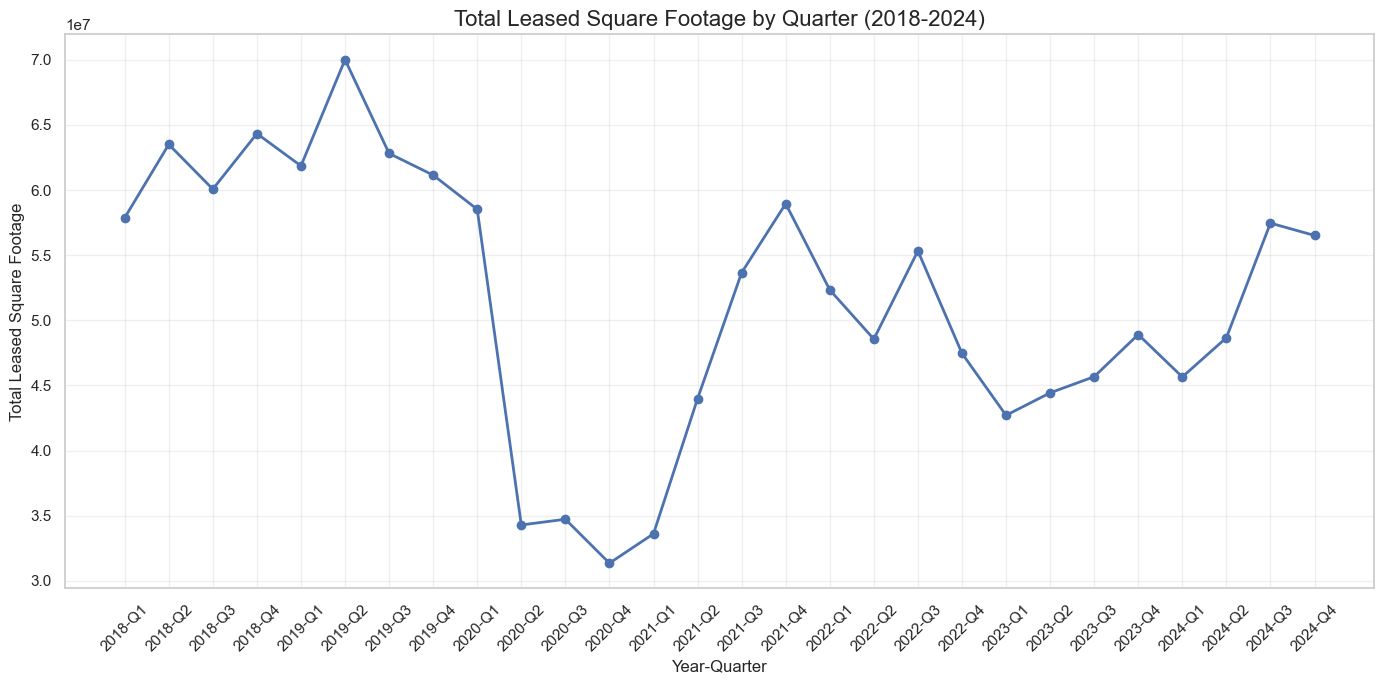

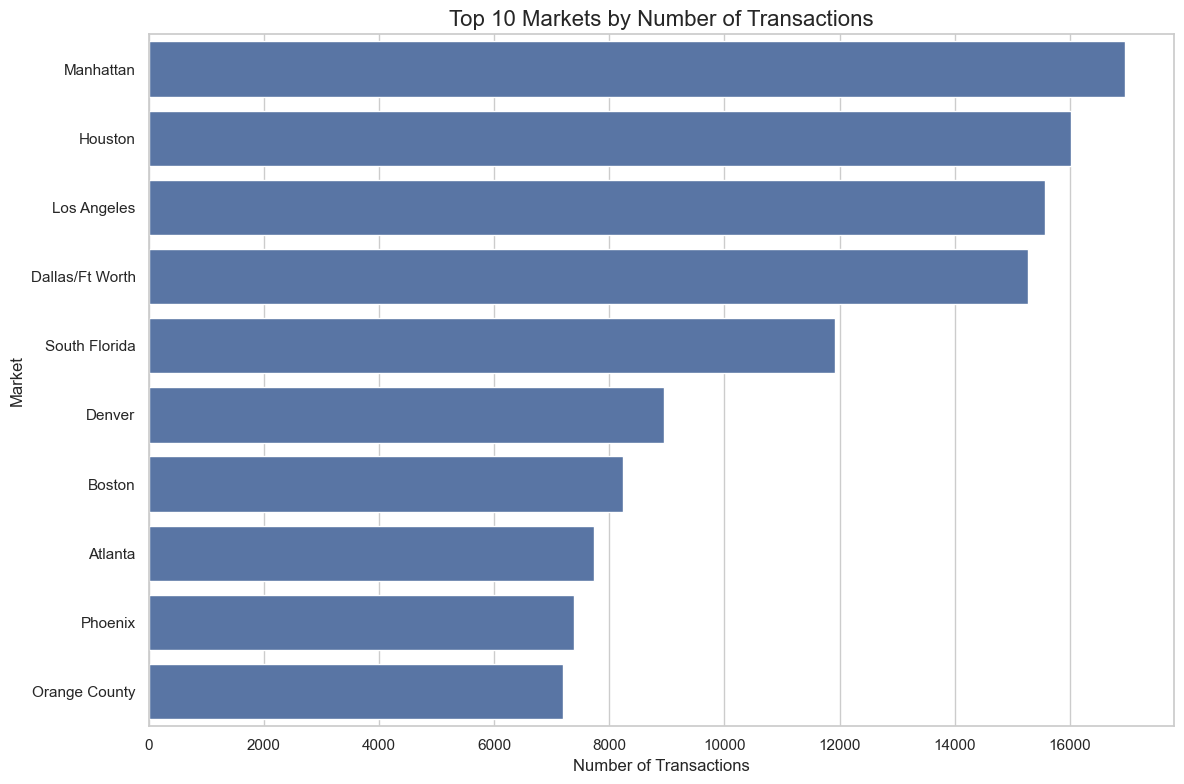

<Figure size 1400x800 with 0 Axes>

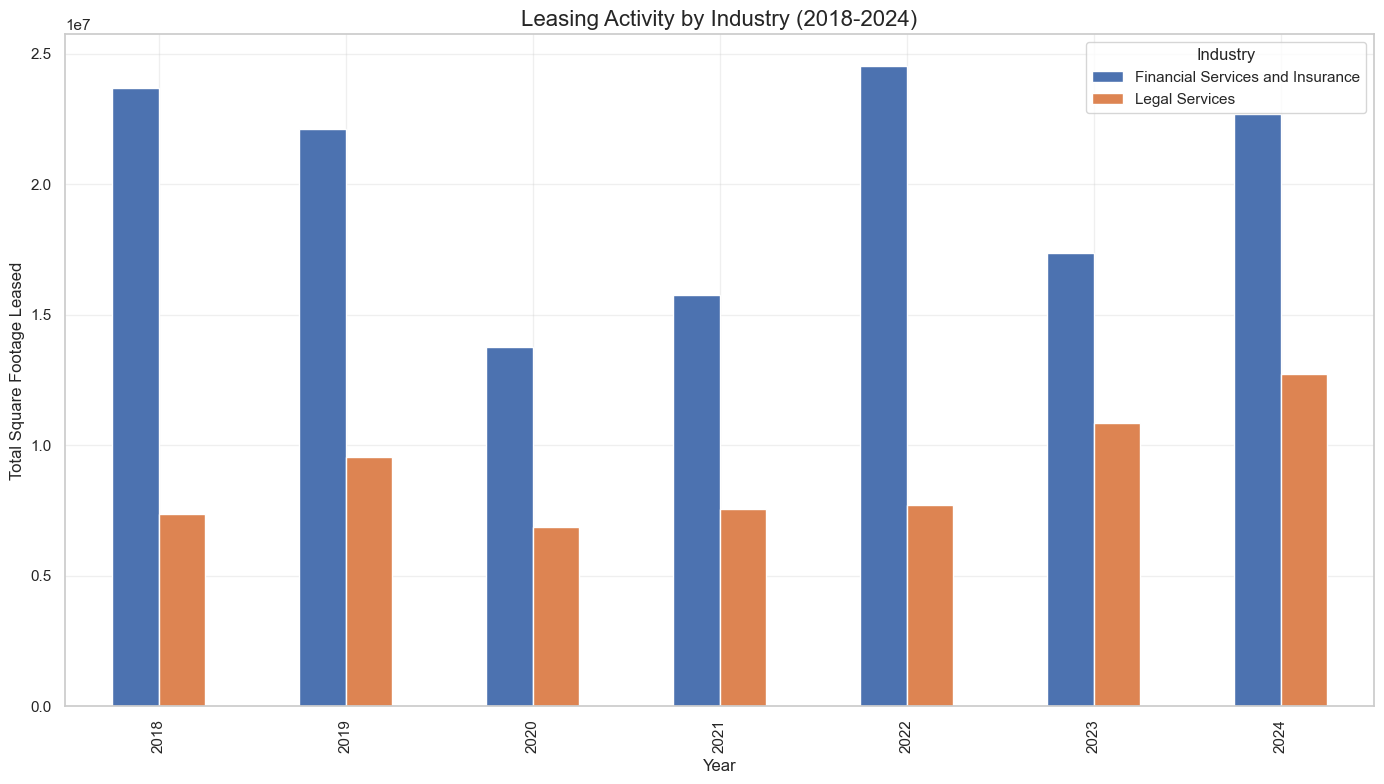

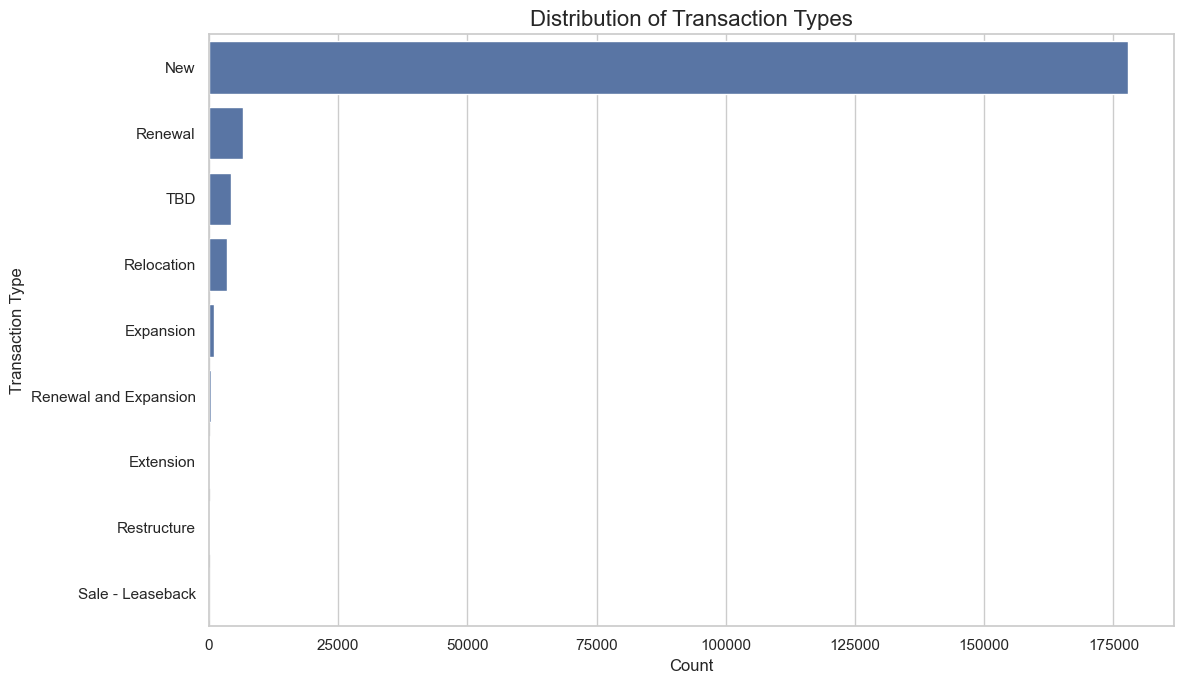

<Figure size 1400x800 with 0 Axes>

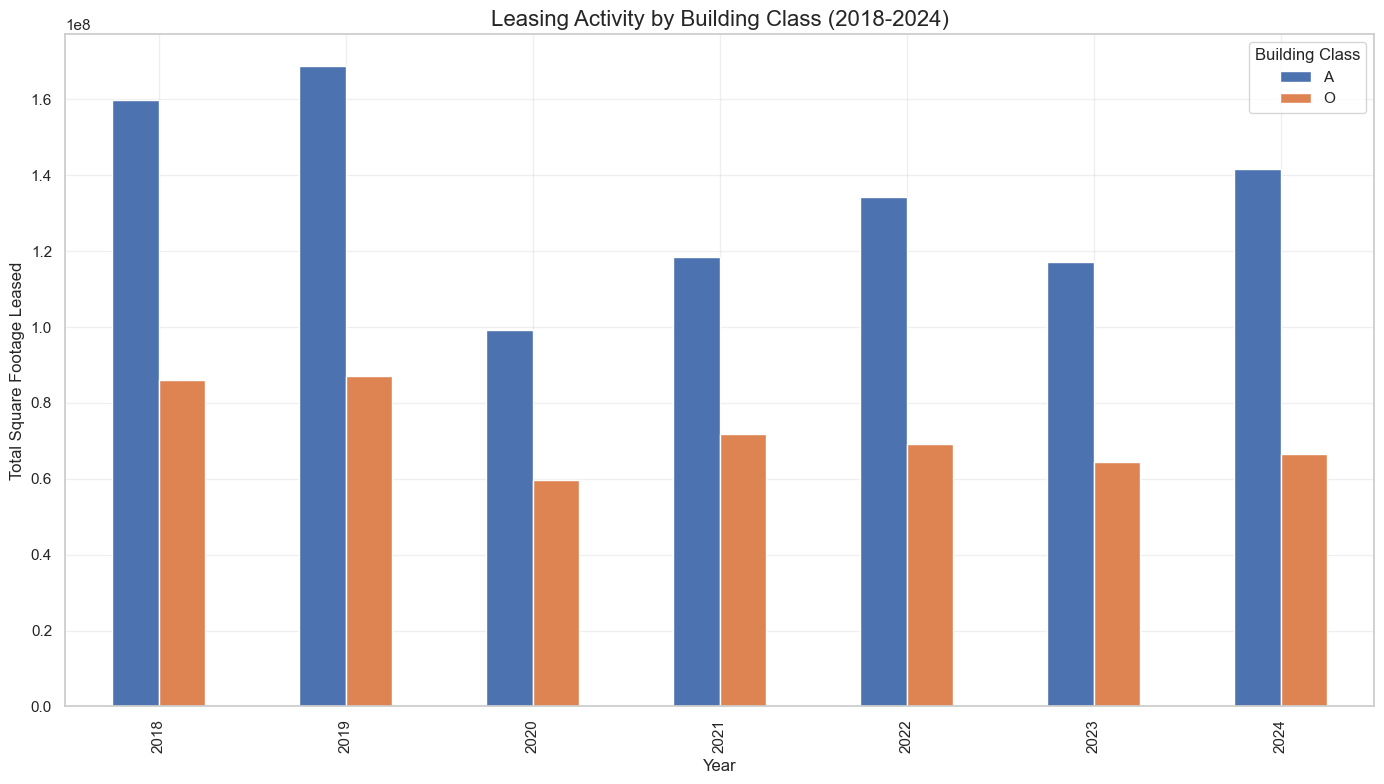

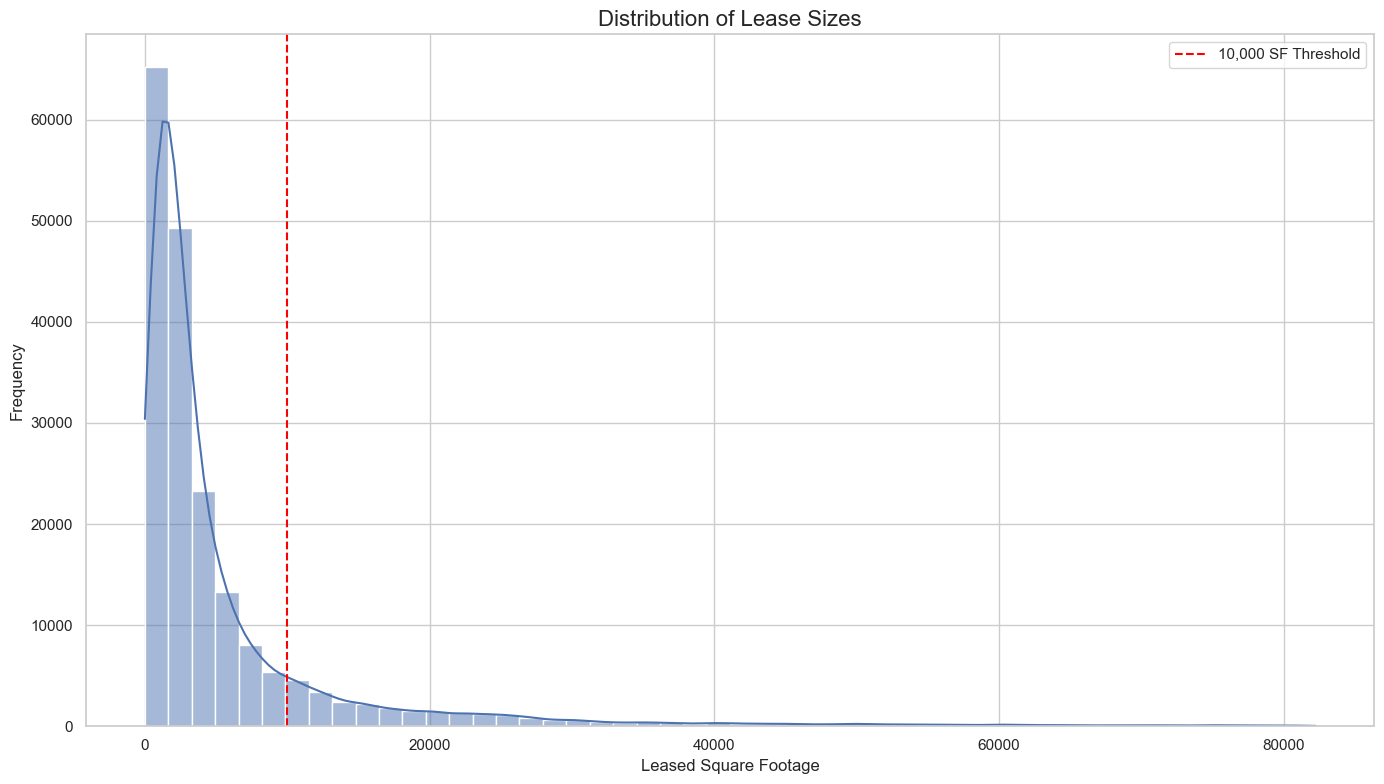

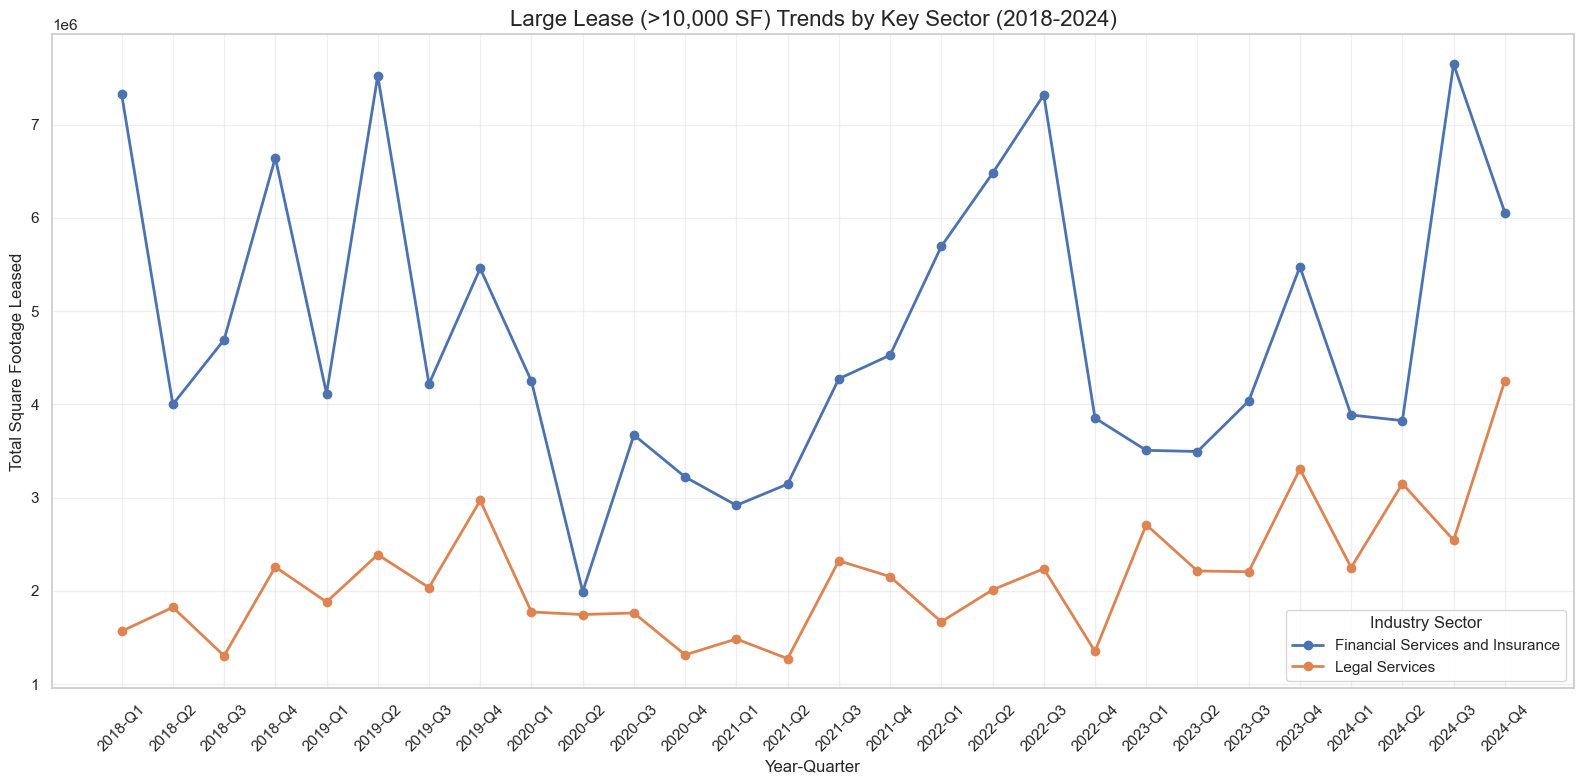

<Figure size 1400x800 with 0 Axes>

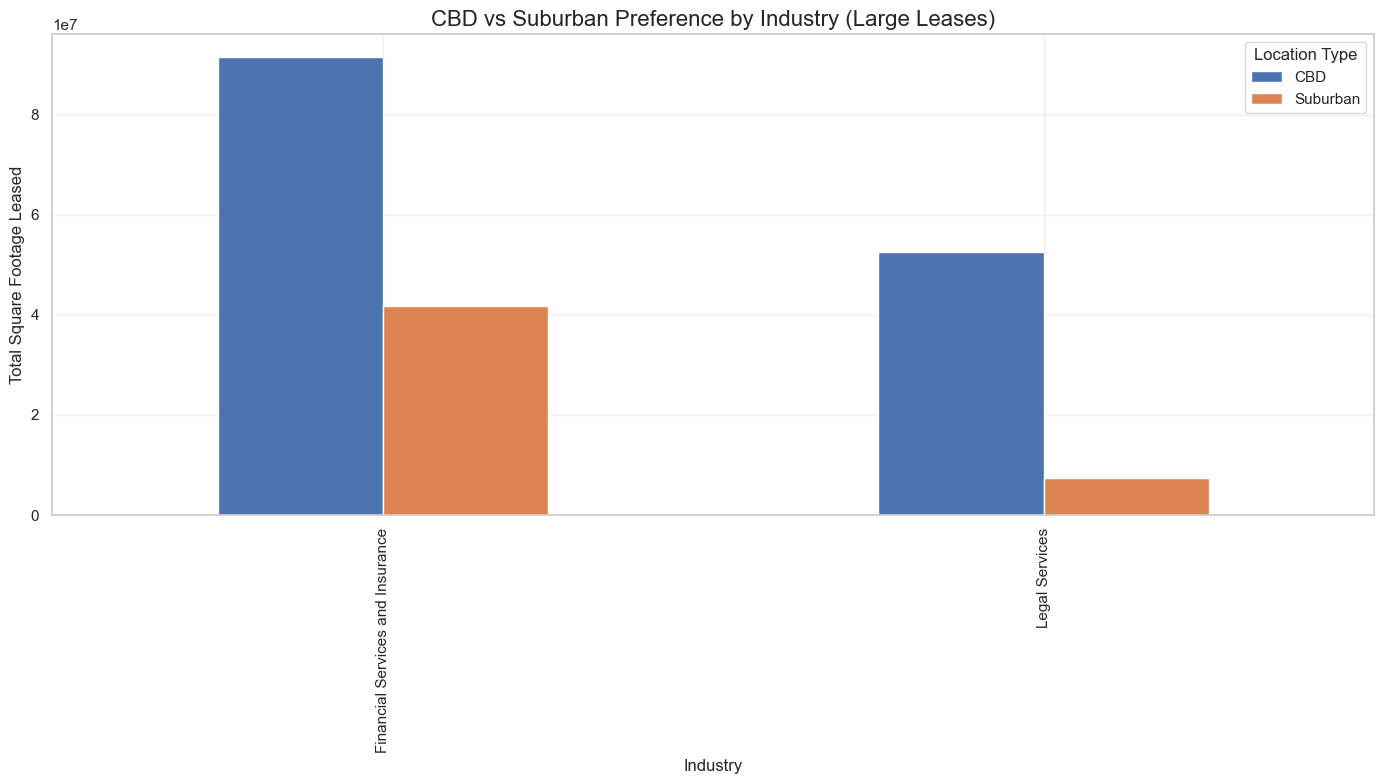

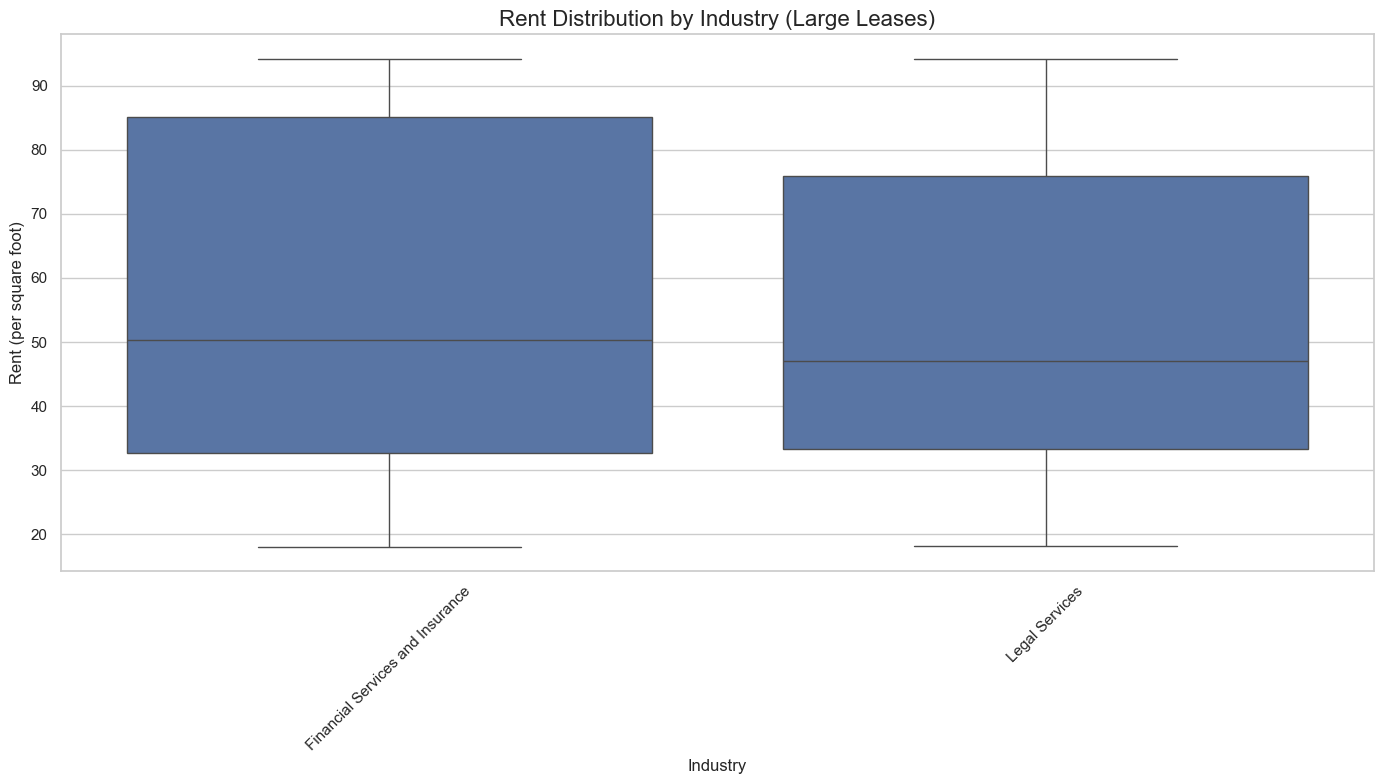

Could not create pandemic summary: If using all scalar values, you must pass an index


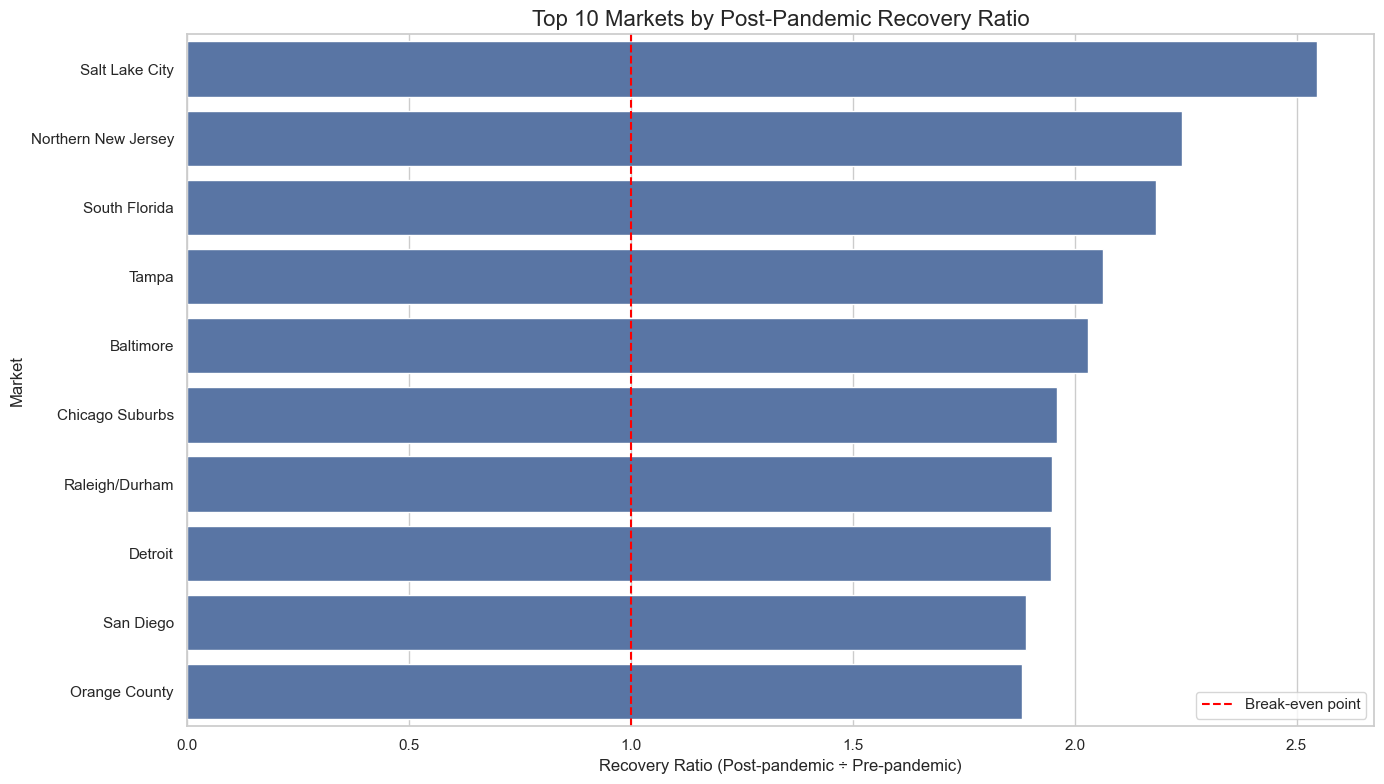

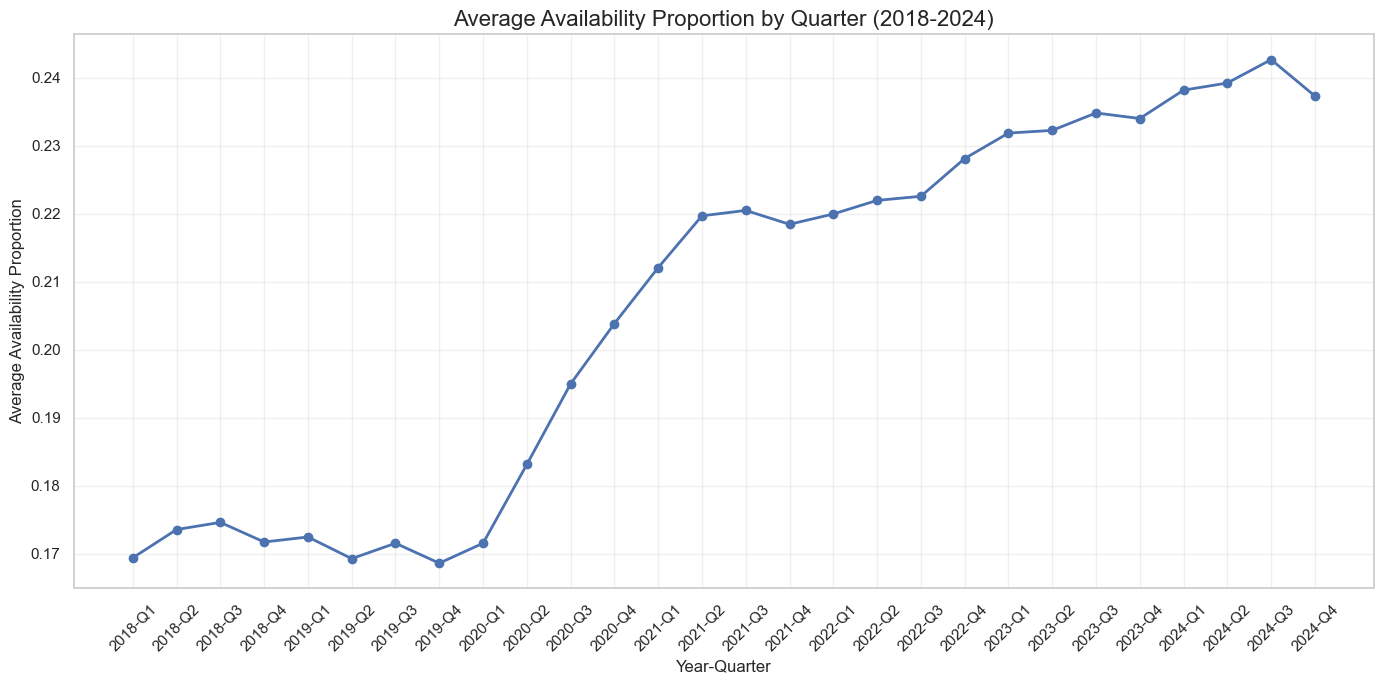

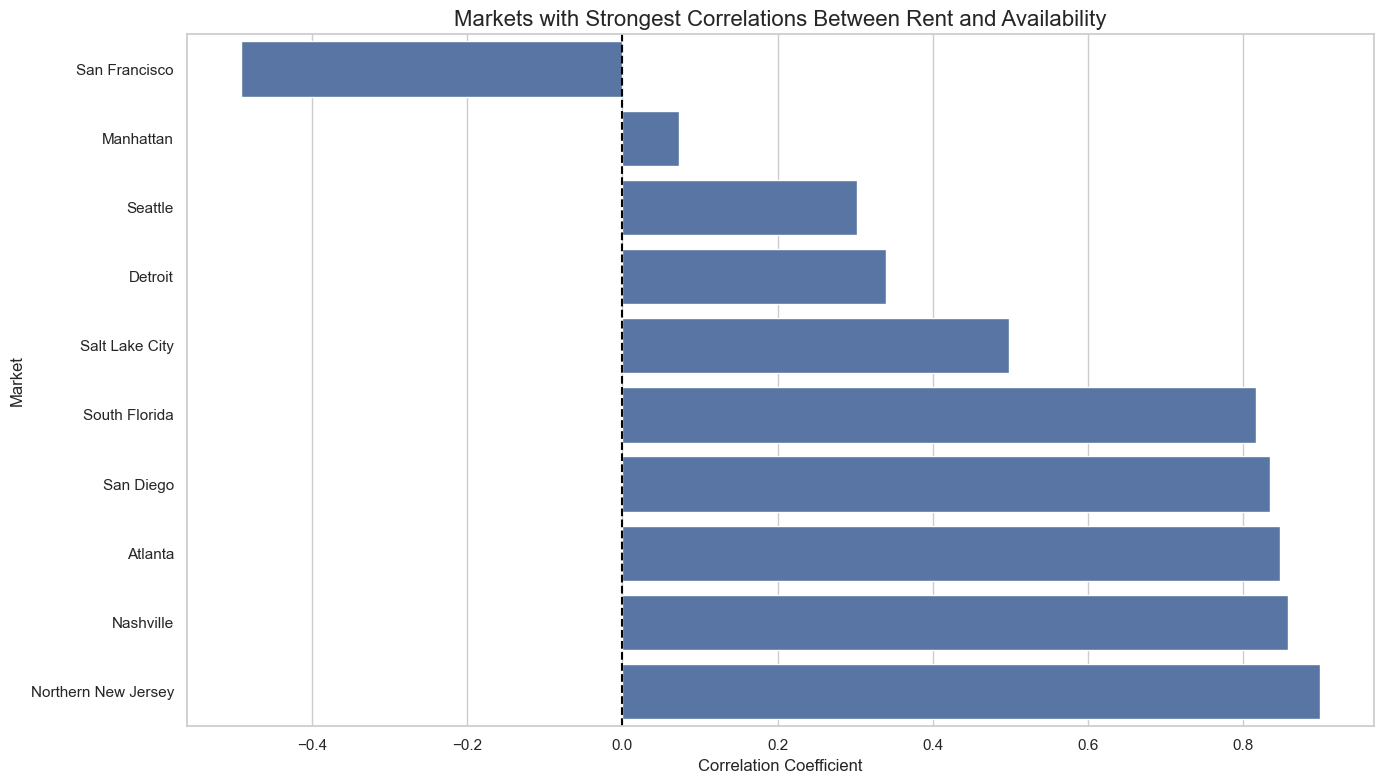

Exploratory analysis complete. Check the generated visualizations to understand the data patterns.


In [4]:
# Set plot styles
plt.style.use('ggplot')
sns.set(style="whitegrid")

# Load the data
df = pd.read_csv('Leases.csv')

# Display basic information about the dataset
print(f"Dataset shape: {df.shape}")
print("\nFirst few rows:")
display(df.head())

print("\nBasic statistics:")
display(df.describe())

# Check missing data
missing_data = df.isnull().sum().sort_values(ascending=False)
missing_percent = (missing_data / len(df) * 100).round(2)
missing_df = pd.DataFrame({'Missing Values': missing_data, 'Percentage': missing_percent})
print("\nMissing data analysis:")
display(missing_df[missing_df['Missing Values'] > 0])

# Convert numeric columns if needed
numeric_cols = ['leasedSF', 'RBA', 'available_space', 'availability_proportion', 
                'internal_class_rent', 'overall_rent', 'zip']
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Create year_quarter column for time-based analysis
if 'year' in df.columns and 'quarter' in df.columns:
    df['year_quarter'] = df['year'].astype(str) + '_' + df['quarter']

# Focus on leases over 10,000 sq ft as recommended in the challenge
if 'leasedSF' in df.columns:
    large_leases = df[df['leasedSF'] >= 10000].copy()
    print(f"\nNumber of large leases (≥10,000 sq ft): {len(large_leases)}")
else:
    print("\nWarning: 'leasedSF' column not found. Cannot filter large leases.")

# 1. Time Series Analysis - Leasing Activity by Year/Quarter
try:
    if 'year' in df.columns and 'quarter' in df.columns and 'leasedSF' in df.columns:
        time_series = df.groupby(['year', 'quarter'])['leasedSF'].sum().reset_index()
        time_series['year_quarter'] = time_series['year'].astype(str) + '-' + time_series['quarter']
        
        # Create the plot
        plt.figure(figsize=(14, 7))
        plt.plot(time_series['year_quarter'], time_series['leasedSF'], marker='o', linewidth=2)
        plt.title('Total Leased Square Footage by Quarter (2018-2024)', fontsize=16)
        plt.xlabel('Year-Quarter', fontsize=12)
        plt.ylabel('Total Leased Square Footage', fontsize=12)
        plt.xticks(rotation=45)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
    else:
        print("Missing required columns for time series analysis")
except Exception as e:
    print(f"Error in time series analysis: {e}")

# 2. Market Analysis - Top Markets by Transaction Volume
try:
    if 'market' in df.columns:
        market_counts = df['market'].value_counts().reset_index()
        market_counts.columns = ['Market', 'Number of Transactions']
        top_markets = market_counts.head(10)
        
        plt.figure(figsize=(12, 8))
        sns.barplot(x='Number of Transactions', y='Market', data=top_markets)
        plt.title('Top 10 Markets by Number of Transactions', fontsize=16)
        plt.xlabel('Number of Transactions', fontsize=12)
        plt.ylabel('Market', fontsize=12)
        plt.tight_layout()
        plt.show()
    else:
        print("Column 'market' not found in dataset - skipping market analysis")
except Exception as e:
    print(f"Error in market analysis: {e}")

# 3. Industry Analysis for the three key sectors mentioned
key_industries = ['Financial Services and Insurance', 'Legal Services', 'Technology']
industry_data = df[df['internal_industry'].isin(key_industries)]

# Create a pivot table of industry by year
industry_pivot = pd.pivot_table(
    industry_data, 
    values='leasedSF', 
    index='year',
    columns='internal_industry', 
    aggfunc='sum'
)

# Plot the industry trends
plt.figure(figsize=(14, 8))
industry_pivot.plot(kind='bar', figsize=(14, 8))
plt.title('Leasing Activity by Industry (2018-2024)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Square Footage Leased', fontsize=12)
plt.legend(title='Industry')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 4. Geographical Analysis - Map of Leasing Activity (if coordinates available)
try:
    if 'state' in df.columns and 'leasedSF' in df.columns:
        # Create state-level summary
        states_data = df.groupby('state')['leasedSF'].sum().reset_index()
        states_data.columns = ['state', 'total_leased_sf']
        
        # Plot on US map using plotly
        fig = px.choropleth(
            states_data,
            locations='state',
            locationmode='USA-states',
            color='total_leased_sf',
            scope='usa',
            color_continuous_scale='Viridis',
            title='Total Leased Square Footage by State'
        )
        fig.update_layout(coloraxis_colorbar=dict(title='Total Leased SF'))
        fig.show()
    else:
        print("Missing required columns for geographical analysis")
except Exception as e:
    print(f"Error in geographical analysis: {e}")
    print("Note: This may be due to missing geopandas library or required column. If using Colab, try installing with !pip install geopandas")

# 5. Transaction Type Analysis
try:
    if 'transaction_type' in df.columns:
        transaction_counts = df['transaction_type'].value_counts().reset_index()
        transaction_counts.columns = ['Transaction Type', 'Count']
        
        plt.figure(figsize=(12, 7))
        sns.barplot(x='Count', y='Transaction Type', data=transaction_counts)
        plt.title('Distribution of Transaction Types', fontsize=16)
        plt.xlabel('Count', fontsize=12)
        plt.ylabel('Transaction Type', fontsize=12)
        plt.tight_layout()
        plt.show()
    else:
        print("Column 'transaction_type' not found in dataset - skipping transaction type analysis")
except Exception as e:
    print(f"Error in transaction type analysis: {e}")

# 6. Building Class Analysis (A vs O)
try:
    if 'internal_class' in df.columns and 'leasedSF' in df.columns and 'year' in df.columns:
        class_pivot = pd.pivot_table(
            df,
            values='leasedSF',
            index='year',
            columns='internal_class',
            aggfunc='sum'
        )
        
        if not class_pivot.empty:
            plt.figure(figsize=(14, 8))
            class_pivot.plot(kind='bar', figsize=(14, 8))
            plt.title('Leasing Activity by Building Class (2018-2024)', fontsize=16)
            plt.xlabel('Year', fontsize=12)
            plt.ylabel('Total Square Footage Leased', fontsize=12)
            plt.legend(title='Building Class')
            plt.grid(True, alpha=0.3)
            plt.tight_layout()
            plt.show()
        else:
            print("No data available for building class pivot table")
    else:
        print("Missing required columns for building class analysis")
except Exception as e:
    print(f"Error in building class analysis: {e}")

# 7. Lease Size Distribution
try:
    if 'leasedSF' in df.columns:
        plt.figure(figsize=(14, 8))
        # Remove outliers for better visualization (optional)
        lease_sizes = df[df['leasedSF'] < df['leasedSF'].quantile(0.99)]
        sns.histplot(data=lease_sizes, x='leasedSF', bins=50, kde=True)
        plt.title('Distribution of Lease Sizes', fontsize=16)
        plt.xlabel('Leased Square Footage', fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
        plt.axvline(x=10000, color='red', linestyle='--', label='10,000 SF Threshold')
        plt.legend()
        plt.tight_layout()
        plt.show()
    else:
        print("Column 'leasedSF' not found in dataset - skipping lease size distribution analysis")
except Exception as e:
    print(f"Error in lease size distribution analysis: {e}")

# 8. Create a comprehensive dashboard using Plotly
try:
    fig = make_subplots(
        rows=3, cols=2,
        subplot_titles=(
            'Total Leased Area by Quarter', 
            'Top Markets by Transaction Volume',
            'Leasing Activity by Industry',
            'Transaction Types',
            'Building Class Comparison',
            'Lease Size Distribution'
        ),
        specs=[
            [{"type": "scatter"}, {"type": "bar"}],
            [{"type": "bar"}, {"type": "pie"}],
            [{"type": "bar"}, {"type": "histogram"}]
        ]
    )

    # 8.1 Time Series - conditionally add if data exists
    if 'time_series' in locals() and not time_series.empty and 'year_quarter' in time_series.columns and 'leasedSF' in time_series.columns:
        fig.add_trace(
            go.Scatter(
                x=time_series['year_quarter'], 
                y=time_series['leasedSF'],
                mode='lines+markers'
            ),
            row=1, col=1
        )

    # 8.2 Top Markets - conditionally add if data exists
    if 'top_markets' in locals() and not top_markets.empty and len(top_markets) >= 5:
        fig.add_trace(
            go.Bar(
                y=top_markets['Market'][:5],
                x=top_markets['Number of Transactions'][:5],
                orientation='h'
            ),
            row=1, col=2
        )

    # 8.3 Industry Analysis - conditionally add if data exists
    if 'industry_pivot' in locals() and not industry_pivot.empty:
        for i, industry in enumerate(industry_pivot.columns):
            fig.add_trace(
                go.Bar(
                    x=industry_pivot.index,
                    y=industry_pivot[industry],
                    name=industry
                ),
                row=2, col=1
            )

    # 8.4 Transaction Types - conditionally add if data exists
    if 'transaction_counts' in locals() and not transaction_counts.empty and len(transaction_counts) >= 5:
        fig.add_trace(
            go.Pie(
                labels=transaction_counts['Transaction Type'][:5],
                values=transaction_counts['Count'][:5],
            ),
            row=2, col=2
        )

    # 8.5 Building Class - conditionally add if data exists
    if 'class_pivot' in locals() and not class_pivot.empty:
        if 'A' in class_pivot.columns:
            fig.add_trace(
                go.Bar(
                    x=class_pivot.index,
                    y=class_pivot['A'],
                    name='Class A'
                ),
                row=3, col=1
            )
        if 'O' in class_pivot.columns:
            fig.add_trace(
                go.Bar(
                    x=class_pivot.index,
                    y=class_pivot['O'],
                    name='Other Classes'
                ),
                row=3, col=1
            )

    # 8.6 Lease Size Distribution - conditionally add if data exists
    if 'lease_sizes' in locals() and not lease_sizes.empty:
        fig.add_trace(
            go.Histogram(
                x=lease_sizes['leasedSF'],
                nbinsx=50,
            ),
            row=3, col=2
        )

    # Update layout
    fig.update_layout(
        height=1200,
        width=1200,
        title_text="Savills Commercial Real Estate - Key Insights Dashboard",
        showlegend=False
    )

    fig.show()
except Exception as e:
    print(f"Error creating dashboard: {e}")

# 9. Additional Analysis for the Three Key Sectors (Legal, Financial, Tech)
# Focusing on large leases (>10,000 SF) as recommended
try:
    if 'large_leases' in locals() and 'internal_industry' in large_leases.columns and 'leasedSF' in large_leases.columns:
        key_industries = ['Financial Services and Insurance', 'Legal Services', 'Technology']
        
        # Check if we have any of the target industries in our data
        available_industries = set(large_leases['internal_industry'].dropna().unique())
        target_industries = [ind for ind in key_industries if ind in available_industries]
        
        if target_industries:
            # Filter for key industries and large leases
            key_sectors_large = large_leases[large_leases['internal_industry'].isin(target_industries)]
            
            if not key_sectors_large.empty and 'year' in key_sectors_large.columns and 'quarter' in key_sectors_large.columns:
                # Examine trends over time by sector
                sector_time_pivot = pd.pivot_table(
                    key_sectors_large,
                    values='leasedSF',
                    index=['year', 'quarter'],
                    columns='internal_industry',
                    aggfunc='sum'
                ).reset_index()
                
                if not sector_time_pivot.empty:
                    sector_time_pivot['year_quarter'] = sector_time_pivot['year'].astype(str) + '-' + sector_time_pivot['quarter']
                    
                    # Plot sector trends
                    plt.figure(figsize=(16, 8))
                    for industry in target_industries:
                        if industry in sector_time_pivot.columns:
                            plt.plot(
                                sector_time_pivot['year_quarter'], 
                                sector_time_pivot[industry], 
                                marker='o', 
                                linewidth=2,
                                label=industry
                            )
                    
                    plt.title('Large Lease (>10,000 SF) Trends by Key Sector (2018-2024)', fontsize=16)
                    plt.xlabel('Year-Quarter', fontsize=12)
                    plt.ylabel('Total Square Footage Leased', fontsize=12)
                    plt.xticks(rotation=45)
                    plt.legend(title='Industry Sector')
                    plt.grid(True, alpha=0.3)
                    plt.tight_layout()
                    plt.show()
                else:
                    print("No data available for sector time pivot table")
            else:
                print("Missing time data or no key sector data available for large leases")
        else:
            print(f"None of the target industries {key_industries} found in large leases data")
    else:
        print("Missing required columns or large_leases data for key sectors analysis")
except Exception as e:
    print(f"Error in key sectors analysis: {e}")

# 10. CBD vs Suburban Analysis for Key Sectors
try:
    if 'large_leases' in locals() and 'internal_industry' in large_leases.columns and 'CBD_suburban' in large_leases.columns and 'leasedSF' in large_leases.columns:
        key_industries = ['Financial Services and Insurance', 'Legal Services', 'Technology']
        
        # Check if we have any of the target industries in our data
        available_industries = set(large_leases['internal_industry'].dropna().unique())
        target_industries = [ind for ind in key_industries if ind in available_industries]
        
        if target_industries:
            # Filter for key industries and large leases
            key_sectors_large = large_leases[large_leases['internal_industry'].isin(target_industries)]
            
            if not key_sectors_large.empty:
                location_sector_pivot = pd.pivot_table(
                    key_sectors_large,
                    values='leasedSF',
                    index='internal_industry',
                    columns='CBD_suburban',
                    aggfunc='sum'
                )
                
                if not location_sector_pivot.empty:
                    plt.figure(figsize=(14, 8))
                    location_sector_pivot.plot(kind='bar', figsize=(14, 8))
                    plt.title('CBD vs Suburban Preference by Industry (Large Leases)', fontsize=16)
                    plt.xlabel('Industry', fontsize=12)
                    plt.ylabel('Total Square Footage Leased', fontsize=12)
                    plt.legend(title='Location Type')
                    plt.grid(True, alpha=0.3)
                    plt.tight_layout()
                    plt.show()
                else:
                    print("No data available for CBD vs Suburban pivot table")
            else:
                print("No key sector data available for CBD vs Suburban analysis")
        else:
            print(f"None of the target industries {key_industries} found in the data")
    else:
        print("Missing required columns for CBD vs Suburban analysis")
except Exception as e:
    print(f"Error in CBD vs Suburban analysis: {e}")

# 11. Rent Analysis for Key Sectors
try:
    if 'large_leases' in locals() and 'internal_industry' in large_leases.columns and 'internal_class_rent' in large_leases.columns:
        key_industries = ['Financial Services and Insurance', 'Legal Services', 'Technology']
        
        # Check if we have any of the target industries in our data
        available_industries = set(large_leases['internal_industry'].dropna().unique())
        target_industries = [ind for ind in key_industries if ind in available_industries]
        
        if target_industries:
            # Filter for key industries and large leases
            key_sectors_large = large_leases[large_leases['internal_industry'].isin(target_industries)]
            
            if not key_sectors_large.empty:
                # Remove rows with null rent values
                rent_data = key_sectors_large.dropna(subset=['internal_class_rent'])
                
                if not rent_data.empty:
                    plt.figure(figsize=(14, 8))
                    sns.boxplot(x='internal_industry', y='internal_class_rent', data=rent_data)
                    plt.title('Rent Distribution by Industry (Large Leases)', fontsize=16)
                    plt.xlabel('Industry', fontsize=12)
                    plt.ylabel('Rent (per square foot)', fontsize=12)
                    plt.xticks(rotation=45)
                    plt.tight_layout()
                    plt.show()
                else:
                    print("No rent data available for key sectors")
            else:
                print("No key sector data available for rent analysis")
        else:
            print(f"None of the target industries {key_industries} found in the data")
    else:
        print("Missing required columns for rent analysis")
except Exception as e:
    print(f"Error in rent analysis: {e}")

# 12. Pandemic Impact Analysis - Compare pre and post pandemic trends
# Define pre and post pandemic periods
df['pandemic_period'] = 'Pre-pandemic'
df.loc[((df['year'] == 2020) & (df['quarter'].isin(['Q2', 'Q3', 'Q4']))) | 
       (df['year'] > 2020), 'pandemic_period'] = 'Post-pandemic'

# Check if required columns exist first
if 'leasedSF' in df.columns:
    try:
        # Compare leasing activity
        pandemic_pivot = pd.pivot_table(
            df,
            values='leasedSF',
            index='pandemic_period',
            columns='internal_industry',
            aggfunc=['sum', 'mean', 'count']
        )
        
        # Simplify the table for visualization - with error handling
        try:
            pandemic_summary = pd.DataFrame({
                'Total SF Leased': pandemic_pivot['sum']['leasedSF'] if ('sum' in pandemic_pivot and 'leasedSF' in pandemic_pivot['sum']) else None,
                'Average Lease Size': pandemic_pivot['mean']['leasedSF'] if ('mean' in pandemic_pivot and 'leasedSF' in pandemic_pivot['mean']) else None,
                'Number of Transactions': pandemic_pivot['count']['leasedSF'] if ('count' in pandemic_pivot and 'leasedSF' in pandemic_pivot['count']) else None
            }).dropna(axis=1, how='all')
            
            # Only plot if we have data
            if not pandemic_summary.empty and 'Total SF Leased' in pandemic_summary.columns:
                pandemic_summary['Total SF Leased'].plot(kind='bar', figsize=(14, 7))
                plt.title('Impact of Pandemic on Total Leasing Activity', fontsize=16)
                plt.ylabel('Total Square Footage Leased', fontsize=12)
                plt.grid(True, alpha=0.3)
                plt.tight_layout()
                plt.show()
            else:
                print("Insufficient data to create pandemic impact visualization")
                
        except (KeyError, ValueError) as e:
            print(f"Could not create pandemic summary: {e}")
            
    except (KeyError, ValueError) as e:
        print(f"Could not create pandemic pivot table: {e}")
else:
    print("Column 'leasedSF' not found in dataset - skipping pandemic impact analysis")

# 13. Analyze how different markets recovered from the pandemic
# Group by market and pandemic period
market_recovery = pd.pivot_table(
    df,
    values='leasedSF',
    index='market',
    columns='pandemic_period',
    aggfunc='sum'
).reset_index()

# Calculate recovery ratio
if 'Pre-pandemic' in market_recovery.columns and 'Post-pandemic' in market_recovery.columns:
    market_recovery['recovery_ratio'] = market_recovery['Post-pandemic'] / market_recovery['Pre-pandemic']
    
    # Filter markets with significant activity
    significant_markets = market_recovery[
        (market_recovery['Pre-pandemic'] > 100000) & 
        (market_recovery['Post-pandemic'] > 100000)
    ]
    
    # Sort by recovery ratio
    top_recovery = significant_markets.sort_values('recovery_ratio', ascending=False).head(10)
    
    plt.figure(figsize=(14, 8))
    sns.barplot(x='recovery_ratio', y='market', data=top_recovery)
    plt.title('Top 10 Markets by Post-Pandemic Recovery Ratio', fontsize=16)
    plt.xlabel('Recovery Ratio (Post-pandemic ÷ Pre-pandemic)', fontsize=12)
    plt.ylabel('Market', fontsize=12)
    plt.axvline(x=1, color='red', linestyle='--', label='Break-even point')
    plt.legend()
    plt.tight_layout()
    plt.savefig('market_recovery.png')
    plt.show()

# 14. Availability analysis
# Plot availability proportion trends over time
try:
    if 'availability_proportion' in df.columns:
        availability_trends = df.groupby(['year', 'quarter'])['availability_proportion'].mean().reset_index()
        
        if not availability_trends.empty:
            availability_trends['year_quarter'] = availability_trends['year'].astype(str) + '-' + availability_trends['quarter']
            
            plt.figure(figsize=(14, 7))
            plt.plot(availability_trends['year_quarter'], availability_trends['availability_proportion'], marker='o', linewidth=2)
            plt.title('Average Availability Proportion by Quarter (2018-2024)', fontsize=16)
            plt.xlabel('Year-Quarter', fontsize=12)
            plt.ylabel('Average Availability Proportion', fontsize=12)
            plt.xticks(rotation=45)
            plt.grid(True, alpha=0.3)
            plt.tight_layout()
            plt.show()
        else:
            print("No availability proportion data to visualize")
    else:
        print("Column 'availability_proportion' not found in dataset - skipping availability analysis")
except Exception as e:
    print(f"Error in availability analysis: {e}")

# 15. Advanced Analysis: Market Correlations
# Calculate correlation between rent and availability
try:
    if 'market' in df.columns and 'internal_class_rent' in df.columns and 'availability_proportion' in df.columns:
        # Group by market and calculate correlation
        market_groups = df.groupby('market')
        
        # Initialize an empty list to store correlation results
        corr_results = []
        
        # Iterate through each market group
        for market_name, market_data in market_groups:
            if not market_data['internal_class_rent'].isnull().all() and not market_data['availability_proportion'].isnull().all():
                # Calculate correlation if we have enough data points (at least 5)
                if len(market_data) >= 5:
                    corr = market_data['internal_class_rent'].corr(market_data['availability_proportion'])
                    if not pd.isna(corr):
                        corr_results.append({'Market': market_name, 'Correlation': corr})
        
        if corr_results:
            # Convert results to DataFrame
            rent_avail_corr = pd.DataFrame(corr_results)
            rent_avail_corr = rent_avail_corr.sort_values('Correlation')
            
            # Plot markets with strongest positive and negative correlations
            # Take top and bottom 5 if we have at least 10 markets
            num_to_take = min(5, len(rent_avail_corr) // 2)
            if num_to_take > 0:
                top_corr = pd.concat([rent_avail_corr.head(num_to_take), rent_avail_corr.tail(num_to_take)])
                
                plt.figure(figsize=(14, 8))
                sns.barplot(x='Correlation', y='Market', data=top_corr)
                plt.title('Markets with Strongest Correlations Between Rent and Availability', fontsize=16)
                plt.xlabel('Correlation Coefficient', fontsize=12)
                plt.ylabel('Market', fontsize=12)
                plt.axvline(x=0, color='black', linestyle='--')
                plt.tight_layout()
                plt.show()
            else:
                print("Not enough markets with valid correlation data")
        else:
            print("No valid correlation results between rent and availability")
    else:
        print("Missing required columns for rent-availability correlation analysis")
except Exception as e:
    print(f"Error in correlation analysis: {e}")

print("Exploratory analysis complete. Check the generated visualizations to understand the data patterns.")

Analyzing 10 markets over 19 quarters from 2020-Q1 to 2024-Q3


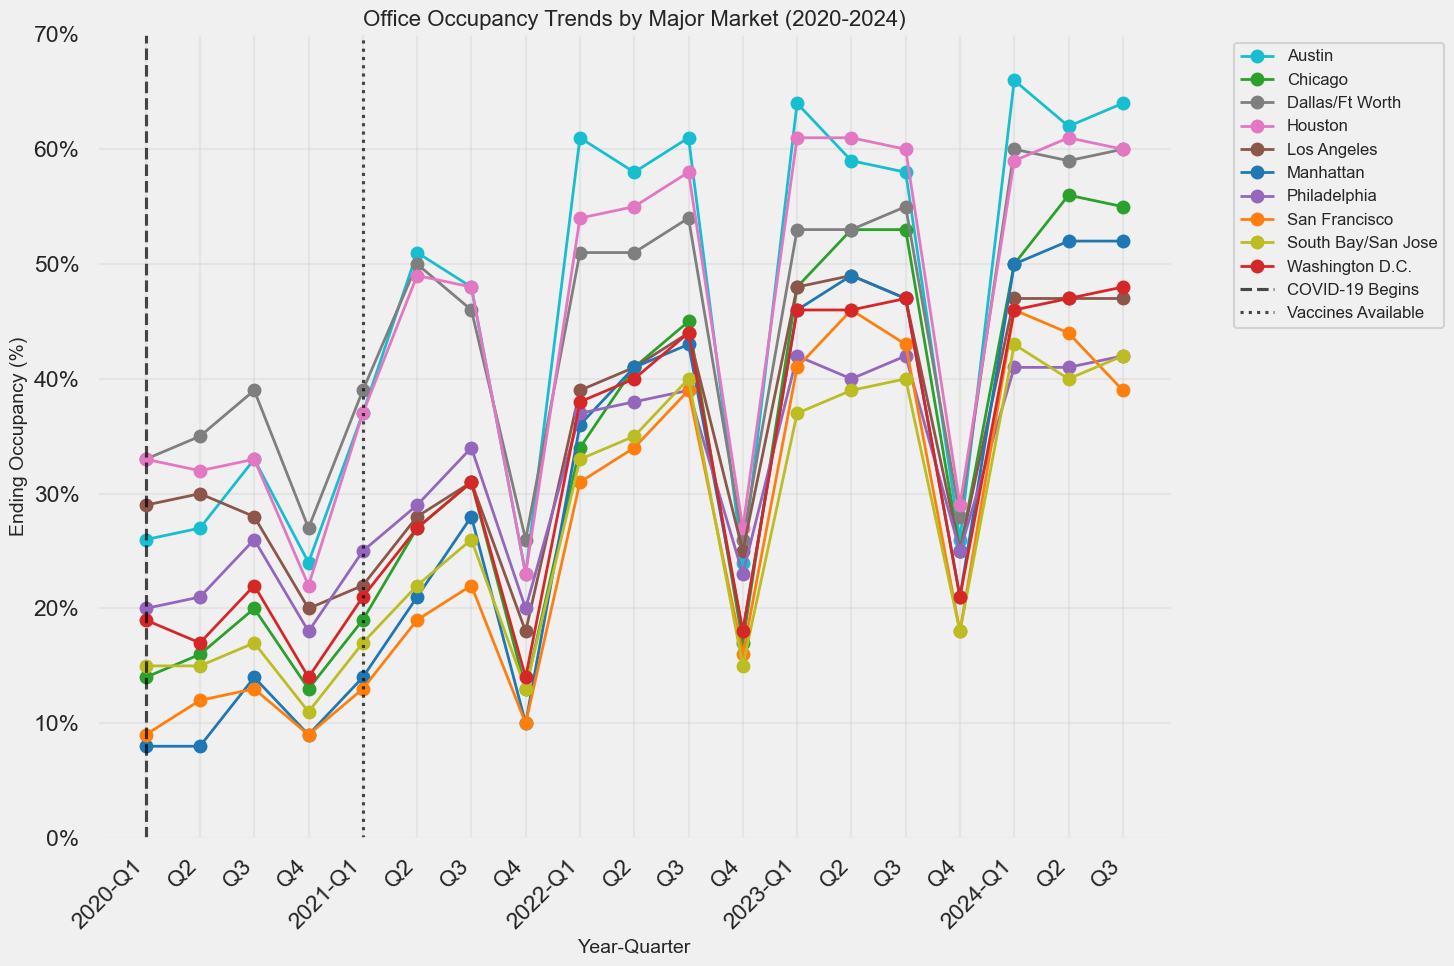

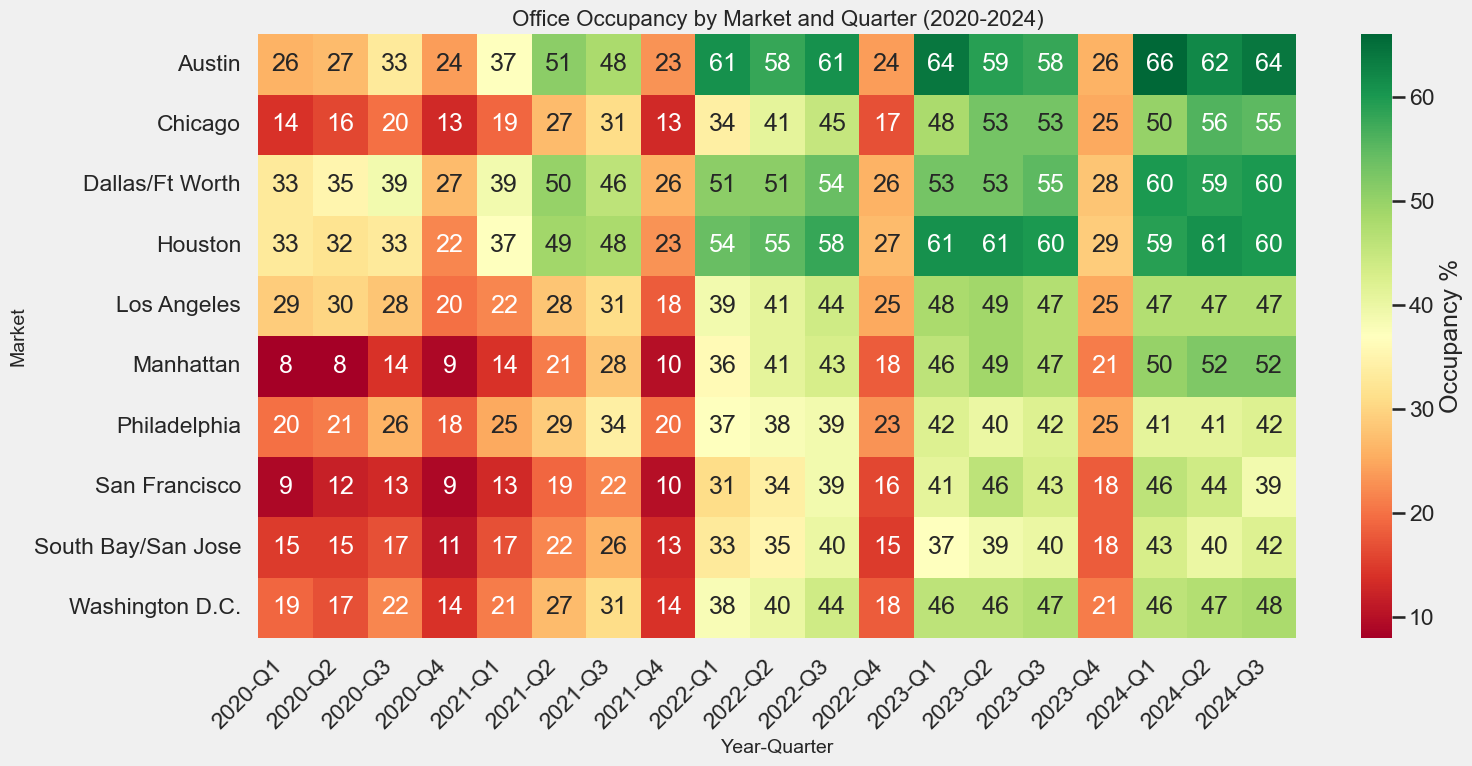

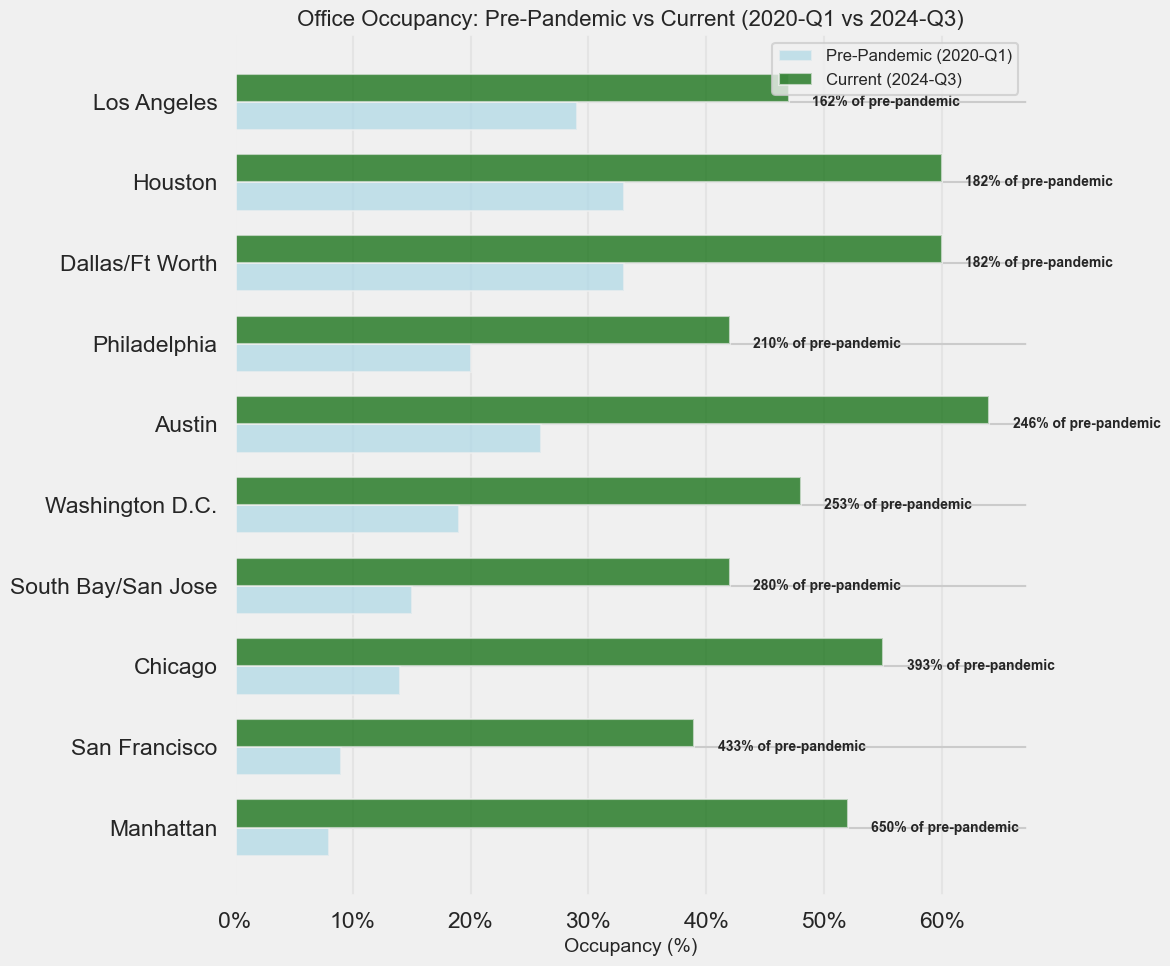

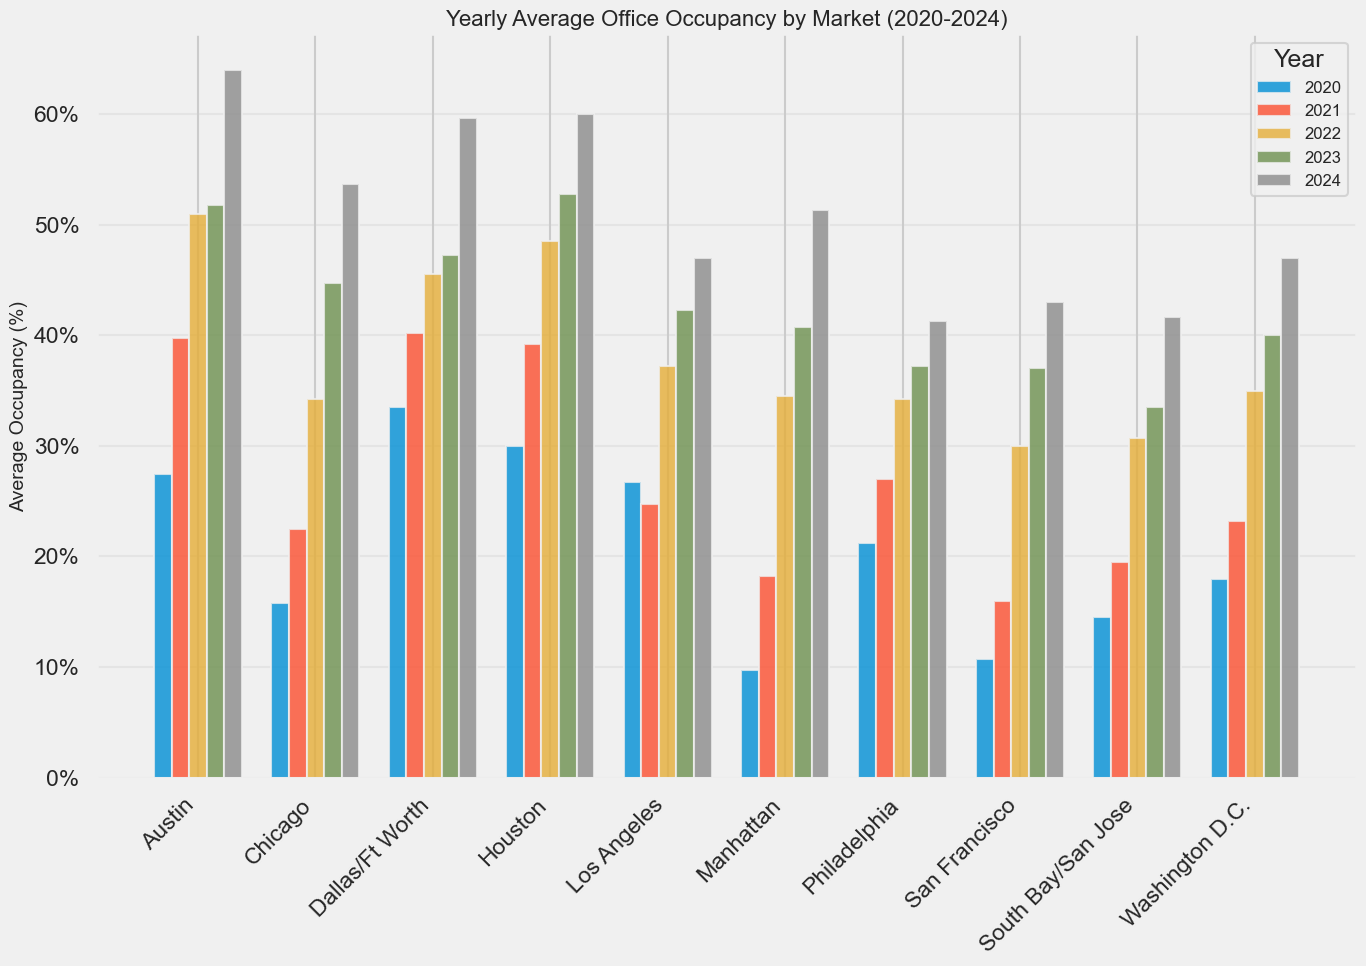

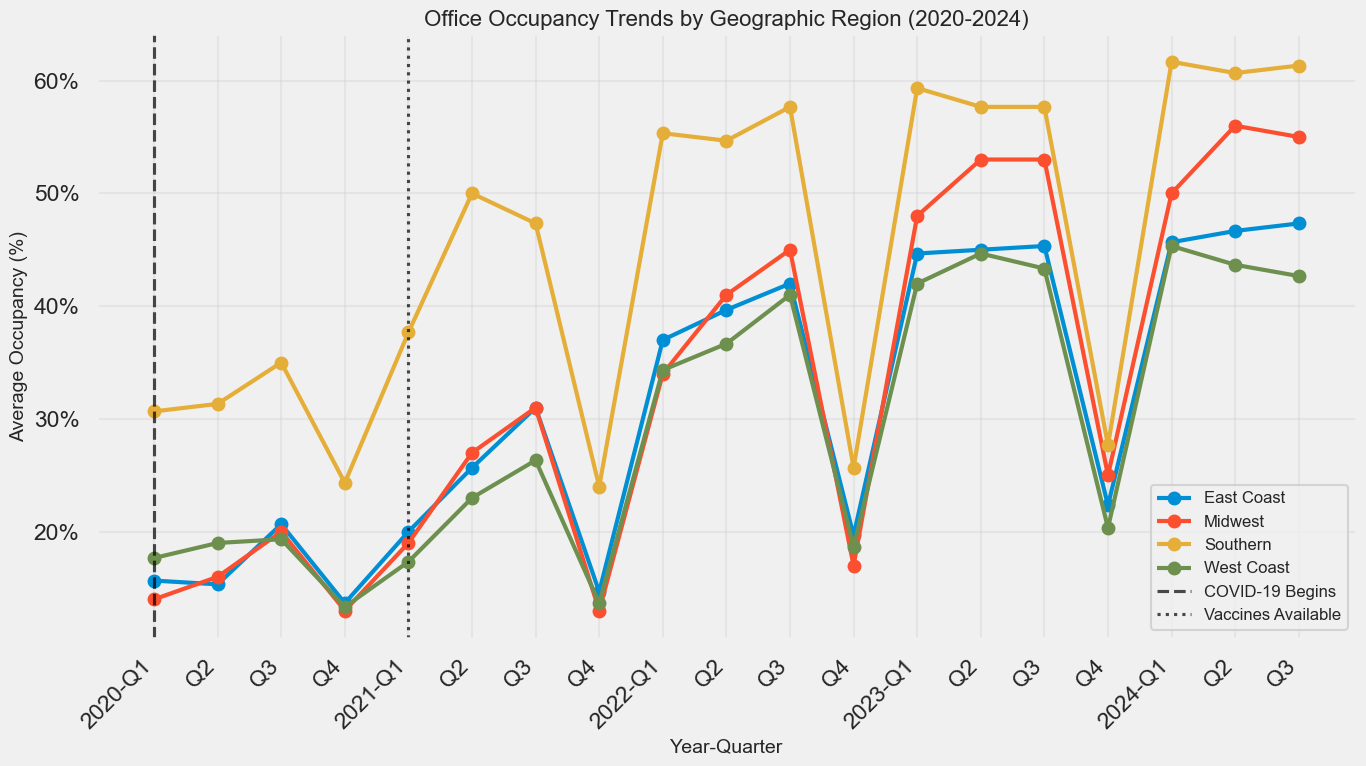

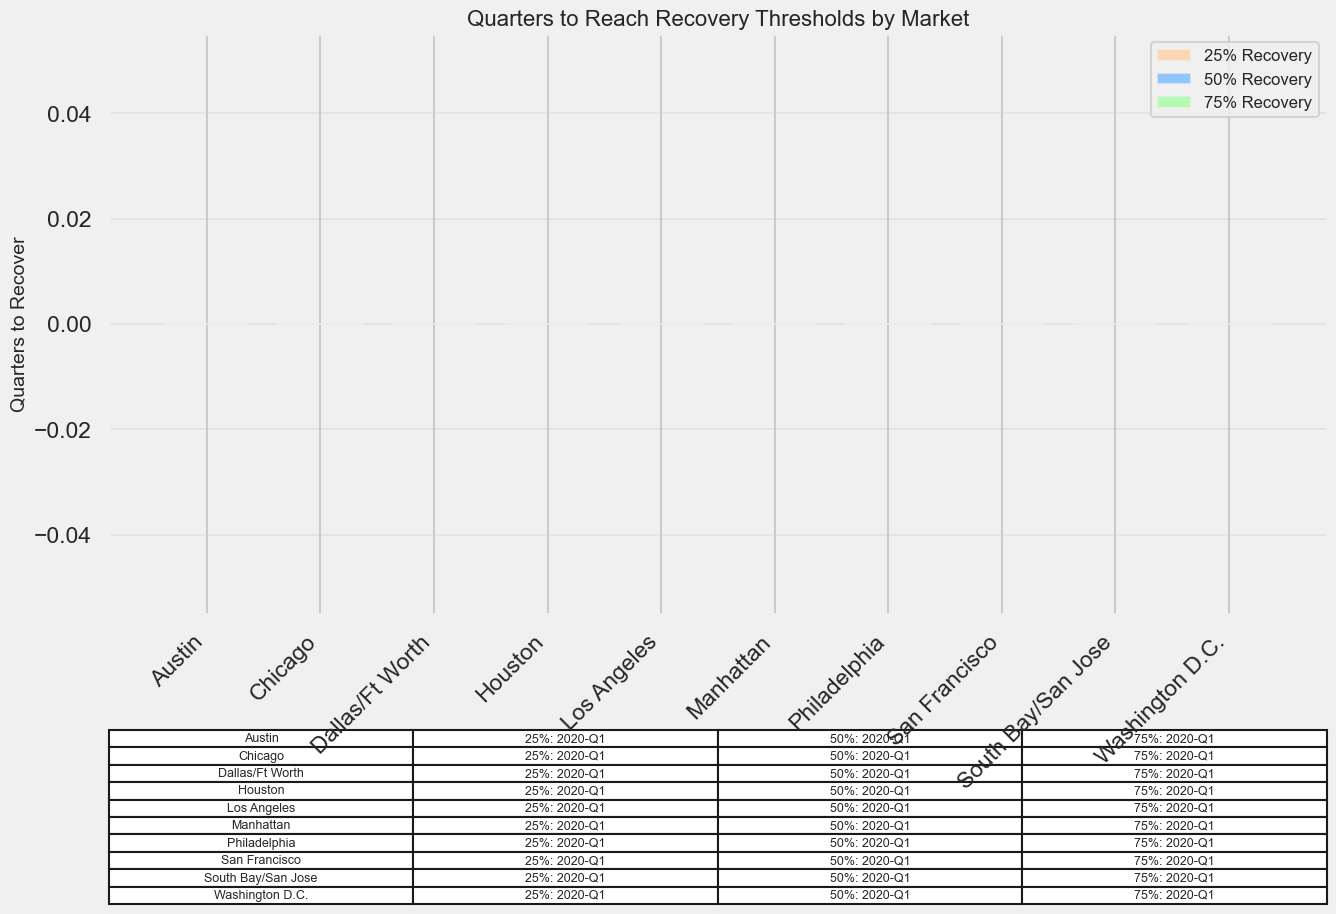

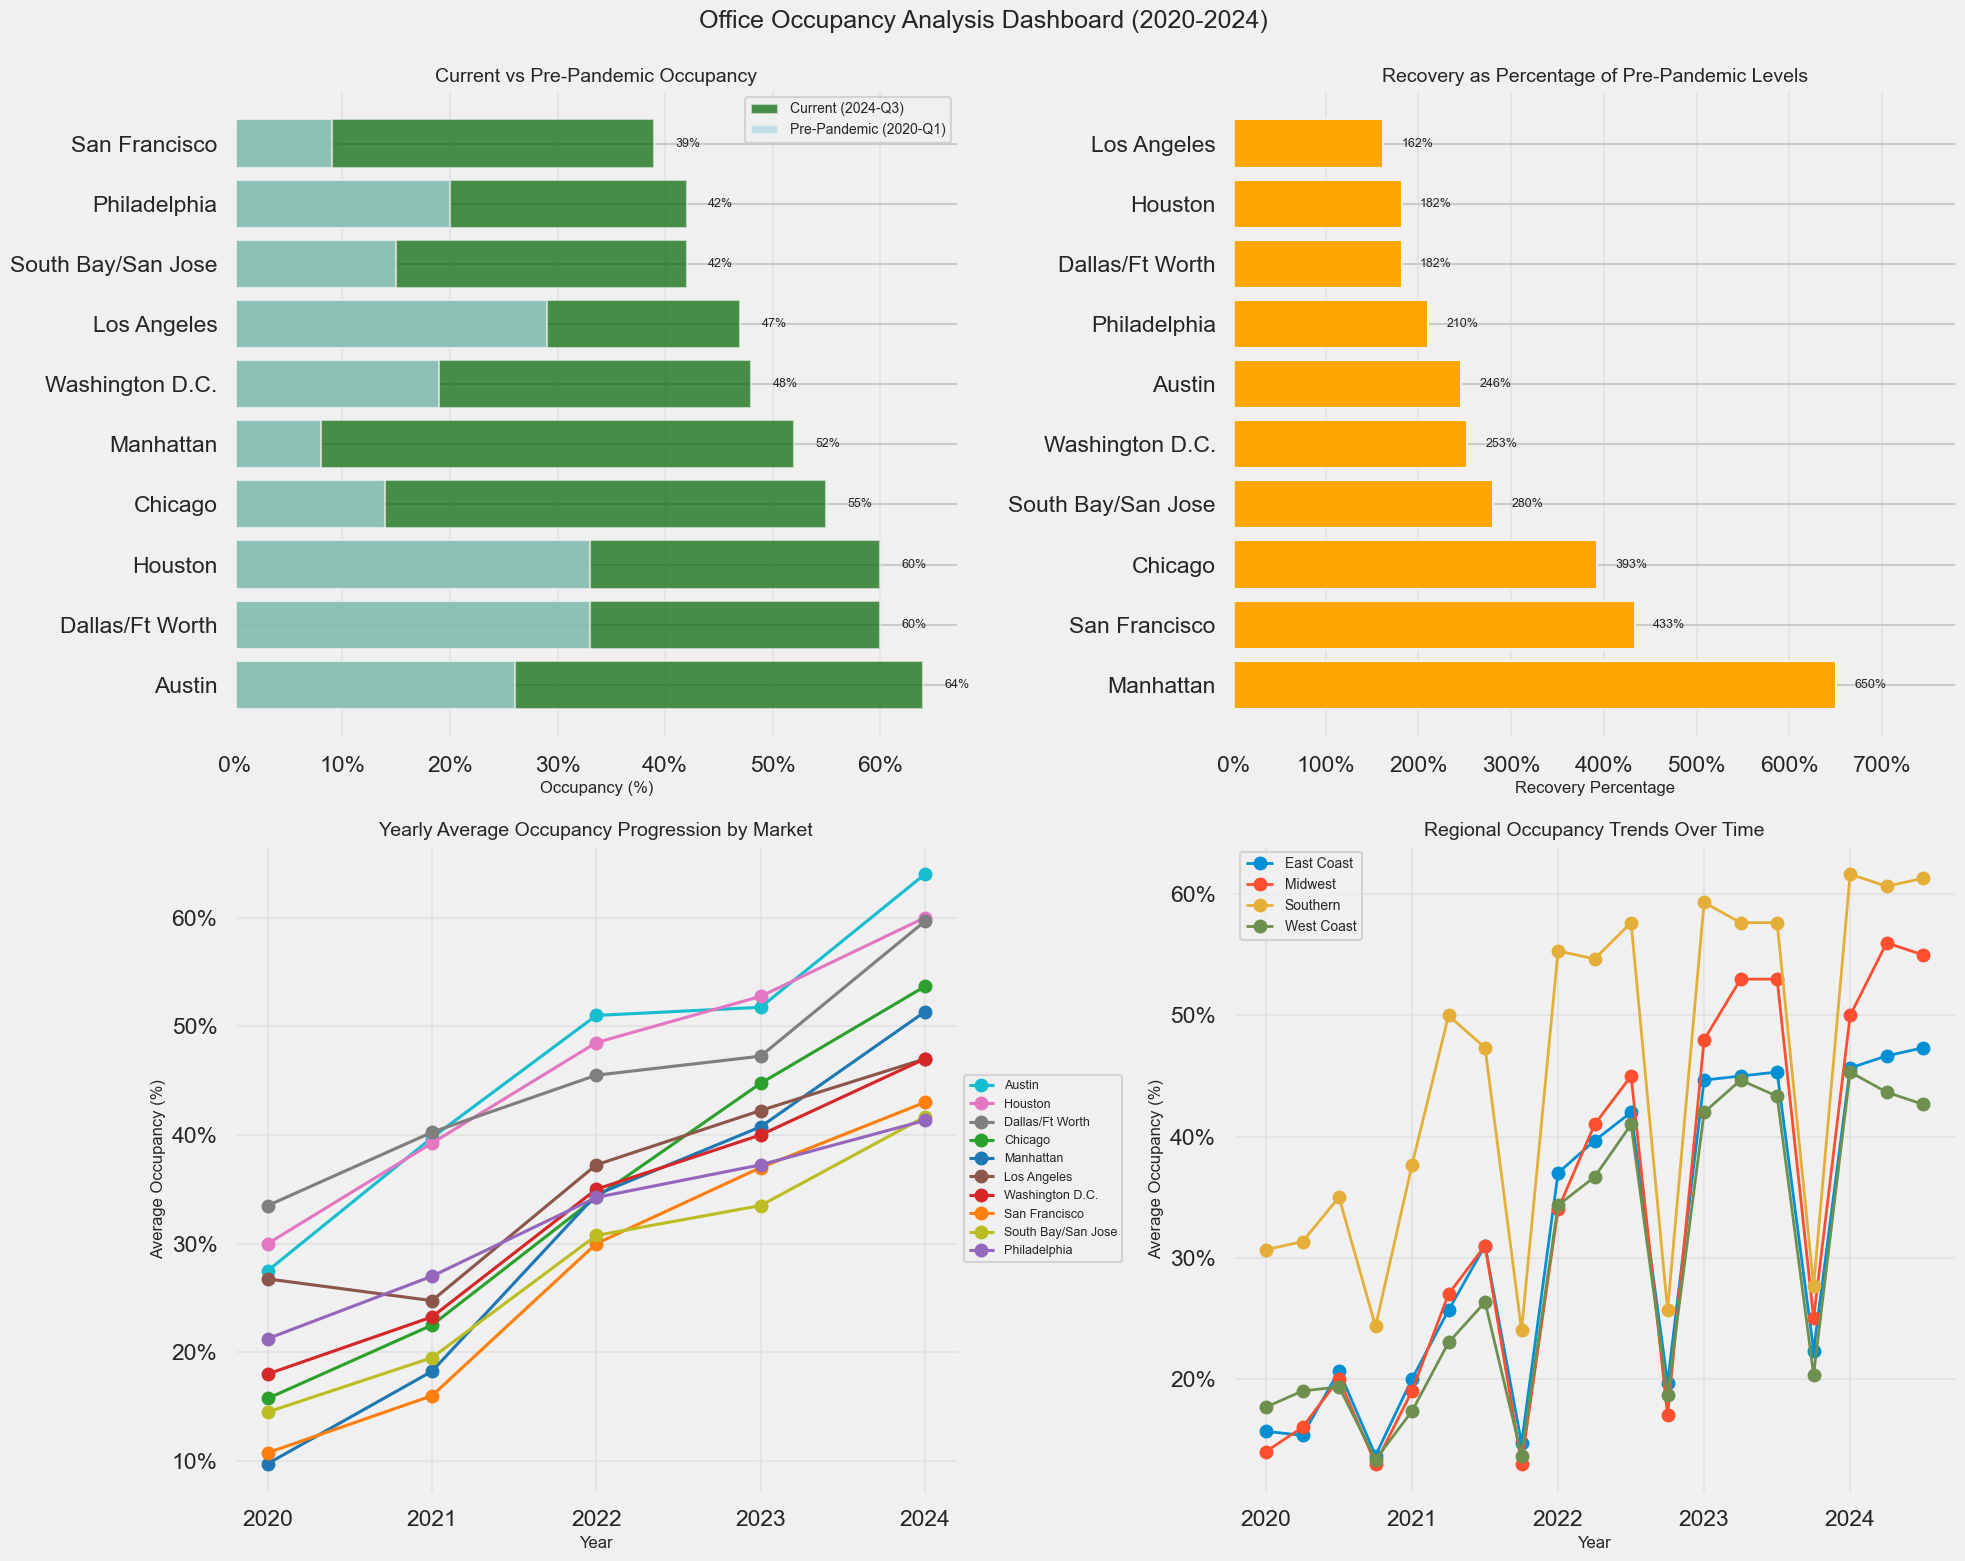

Analysis complete - all visualizations generated successfully!


In [12]:

# Set style for all plots
plt.style.use('fivethirtyeight')
sns.set_context("talk")

# Custom color palette for markets
MARKET_COLORS = {
    "Manhattan": "#1f77b4",
    "San Francisco": "#ff7f0e",
    "Chicago": "#2ca02c",
    "Washington D.C.": "#d62728",
    "Philadelphia": "#9467bd",
    "Los Angeles": "#8c564b",
    "Houston": "#e377c2",
    "Dallas/Ft Worth": "#7f7f7f",
    "South Bay/San Jose": "#bcbd22",
    "Austin": "#17becf"
}

# Function to format percentages on axes
def percentage_formatter(x, pos):
    return f'{int(x)}%'

# Load the data
df = pd.read_csv('Market_Occupancy.csv')

# Basic data preparation
# Create a composite period for time series (year-quarter)
df['period'] = df['year'].astype(str) + '-' + df['quarter']

# Convert proportions to percentages for easier interpretation
df['ending_occupancy_pct'] = df['ending_occupancy_proportion'] * 100
df['starting_occupancy_pct'] = df['starting_occupancy_proportion'] * 100
df['avg_occupancy_pct'] = df['avg_occupancy_proportion'] * 100
df['occupancy_drop'] = df['starting_occupancy_proportion'] - df['ending_occupancy_proportion']
df['occupancy_drop_pct'] = df['occupancy_drop'] * 100

# Create a numeric period column for proper time series ordering
df['period_num'] = df['year'] + df['quarter'].apply(lambda q: {'Q1': 0.0, 'Q2': 0.25, 'Q3': 0.5, 'Q4': 0.75}[q])

# Sort by market and period for proper time series
df = df.sort_values(['market', 'period_num'])

# Get the list of markets and periods
markets = df['market'].unique()
periods = sorted(df['period'].unique())

print(f"Analyzing {len(markets)} markets over {len(periods)} quarters from {periods[0]} to {periods[-1]}")

# 1. Time Series Plot: Occupancy Trends by Market
plt.figure(figsize=(15, 10))
for market in markets:
    market_data = df[df['market'] == market]
    plt.plot(market_data['period_num'], market_data['ending_occupancy_pct'], 
             marker='o', linewidth=2, label=market, color=MARKET_COLORS[market])

# Add vertical lines for key events
plt.axvline(x=2020.0, color='black', linestyle='--', alpha=0.7, label='COVID-19 Begins')
plt.axvline(x=2021.0, color='black', linestyle=':', alpha=0.7, label='Vaccines Available')

plt.title('Office Occupancy Trends by Major Market (2020-2024)', fontsize=16)
plt.xlabel('Year-Quarter', fontsize=14)
plt.ylabel('Ending Occupancy (%)', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.grid(True, alpha=0.3)

# Format the x-axis to show year-quarter
plt.xticks([2020, 2020.25, 2020.5, 2020.75, 
            2021, 2021.25, 2021.5, 2021.75,
            2022, 2022.25, 2022.5, 2022.75, 
            2023, 2023.25, 2023.5, 2023.75,
            2024, 2024.25, 2024.5],
           ['2020-Q1', 'Q2', 'Q3', 'Q4', 
            '2021-Q1', 'Q2', 'Q3', 'Q4', 
            '2022-Q1', 'Q2', 'Q3', 'Q4', 
            '2023-Q1', 'Q2', 'Q3', 'Q4',
            '2024-Q1', 'Q2', 'Q3'], 
           rotation=45, ha='right')

plt.gca().yaxis.set_major_formatter(FuncFormatter(percentage_formatter))
plt.ylim(0, 70)
plt.tight_layout()
plt.show()

# 2. Heatmap: Occupancy by Market and Time
# Create a pivot table for the heatmap
heatmap_data = df.pivot_table(values='ending_occupancy_pct', 
                             index='market', 
                             columns='period',
                             aggfunc='mean')

plt.figure(figsize=(16, 8))
ax = sns.heatmap(heatmap_data, cmap='RdYlGn', annot=True, fmt='.0f', 
                cbar_kws={'label': 'Occupancy %'})
plt.title('Office Occupancy by Market and Quarter (2020-2024)', fontsize=16)
plt.ylabel('Market', fontsize=14)
plt.xlabel('Year-Quarter', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 3. Pre-Pandemic vs Current Comparison
# Get data for first period (2020-Q1) and last period
first_period = periods[0]
last_period = periods[-1]

pre_pandemic = df[df['period'] == first_period].copy()
current = df[df['period'] == last_period].copy()

# Merge the data
comparison = pre_pandemic[['market', 'ending_occupancy_pct']].rename(
    columns={'ending_occupancy_pct': 'pre_pandemic_occupancy'})
comparison = comparison.merge(
    current[['market', 'ending_occupancy_pct']].rename(
        columns={'ending_occupancy_pct': 'current_occupancy'}),
    on='market')

# Calculate recovery percentage
comparison['recovery_pct'] = (comparison['current_occupancy'] / comparison['pre_pandemic_occupancy']) * 100
comparison = comparison.sort_values('recovery_pct', ascending=False)

# Create a horizontal bar chart
fig, ax = plt.subplots(figsize=(12, 10))

# Create bars for both pre-pandemic and current occupancy
x = np.arange(len(comparison))
width = 0.35

ax.barh(x - width/2, comparison['pre_pandemic_occupancy'], width, 
        label='Pre-Pandemic (2020-Q1)', color='lightblue', alpha=0.7)
ax.barh(x + width/2, comparison['current_occupancy'], width,
        label='Current (2024-Q3)', color='darkgreen', alpha=0.7)

# Add market names and recovery percentage
for i, (idx, row) in enumerate(comparison.iterrows()):
    ax.text(max(row['pre_pandemic_occupancy'], row['current_occupancy']) + 2, 
            i, f"{row['recovery_pct']:.0f}% of pre-pandemic", 
            va='center', fontsize=10, fontweight='bold')

ax.set_yticks(x)
ax.set_yticklabels(comparison['market'])
ax.set_xlabel('Occupancy (%)', fontsize=14)
ax.set_title('Office Occupancy: Pre-Pandemic vs Current (2020-Q1 vs 2024-Q3)', fontsize=16)
ax.legend(loc='upper right', fontsize=12)
ax.xaxis.set_major_formatter(FuncFormatter(percentage_formatter))
ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

# 4. Yearly Average Occupancy by Market
# Calculate yearly averages
yearly_avg = df.groupby(['market', 'year'])['ending_occupancy_pct'].mean().reset_index()
yearly_pivot = yearly_avg.pivot(index='market', columns='year', values='ending_occupancy_pct')

# Create a grouped bar chart
fig, ax = plt.subplots(figsize=(14, 10))

x = np.arange(len(yearly_pivot.index))
width = 0.15
years = yearly_pivot.columns

# Plot bars for each year
for i, year in enumerate(years):
    ax.bar(x + (i - len(years)/2 + 0.5) * width, yearly_pivot[year], 
           width, label=str(year), alpha=0.8)

ax.set_xticks(x)
ax.set_xticklabels(yearly_pivot.index, rotation=45, ha='right')
ax.set_ylabel('Average Occupancy (%)', fontsize=14)
ax.set_title('Yearly Average Office Occupancy by Market (2020-2024)', fontsize=16)
ax.legend(title='Year', fontsize=12)
ax.yaxis.set_major_formatter(FuncFormatter(percentage_formatter))
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# 5. Market Volatility Analysis
# Calculate volatility metrics
volatility = []

for market in markets:
    market_data = df[df['market'] == market]
    values = market_data['ending_occupancy_proportion']
    
    mean = values.mean()
    std_dev = values.std()
    cov = std_dev / mean  # Coefficient of variation
    
    year_over_year = []
    for year in range(2021, 2025):
        current_year = market_data[market_data['year'] == year]['ending_occupancy_proportion'].mean()
        prev_year = market_data[market_data['year'] == year-1]['ending_occupancy_proportion'].mean()
        if not np.isnan(current_year) and not np.isnan(prev_year):
            year_over_year.append((current_year / prev_year) - 1)
    
    avg_yoy_change = np.mean(year_over_year) if year_over_year else np.nan
    
    volatility.append({
        'market': market,
        'mean_occupancy': mean * 100,
        'std_dev': std_dev * 100,
        'cov': cov,
        'avg_yoy_change': avg_yoy_change * 100
    })

volatility_df = pd.DataFrame(volatility).sort_values('cov', ascending=False)

# Create a scatter plot of volatility vs. mean occupancy
plt.figure(figsize=(12, 8))
scatter = plt.scatter(volatility_df['mean_occupancy'], volatility_df['cov'], 
                      s=300, c=volatility_df['avg_yoy_change'], 
                      cmap='coolwarm', alpha=0.7)

# Add market labels
for i, row in volatility_df.iterrows():
    plt.annotate(row['market'], 
                (row['mean_occupancy'], row['cov']),
                xytext=(5, 5), textcoords='offset points',
                fontsize=11, fontweight='bold')

plt.colorbar(scatter, label='Avg. Year-over-Year Change (%)')
plt.xlabel('Mean Occupancy (%)', fontsize=14)
plt.ylabel('Coefficient of Variation (Volatility)', fontsize=14)
plt.title('Market Volatility vs. Average Occupancy (2020-2024)', fontsize=16)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 6. Geographic Clusters and Recovery Patterns
# Define geographic clusters
west_coast = ['San Francisco', 'Los Angeles', 'South Bay/San Jose']
east_coast = ['Manhattan', 'Washington D.C.', 'Philadelphia']
southern = ['Houston', 'Dallas/Ft Worth', 'Austin']
midwest = ['Chicago']

# Calculate average occupancy by cluster and period
df['region'] = 'Other'
for market in west_coast:
    df.loc[df['market'] == market, 'region'] = 'West Coast'
for market in east_coast:
    df.loc[df['market'] == market, 'region'] = 'East Coast'
for market in southern:
    df.loc[df['market'] == market, 'region'] = 'Southern'
for market in midwest:
    df.loc[df['market'] == market, 'region'] = 'Midwest'

region_avg = df.groupby(['region', 'period_num'])['ending_occupancy_pct'].mean().reset_index()

# Plot regional trends
plt.figure(figsize=(14, 8))
for region in region_avg['region'].unique():
    region_data = region_avg[region_avg['region'] == region]
    plt.plot(region_data['period_num'], region_data['ending_occupancy_pct'], 
             marker='o', linewidth=3, label=region)

plt.axvline(x=2020.0, color='black', linestyle='--', alpha=0.7, label='COVID-19 Begins')
plt.axvline(x=2021.0, color='black', linestyle=':', alpha=0.7, label='Vaccines Available')

plt.title('Office Occupancy Trends by Geographic Region (2020-2024)', fontsize=16)
plt.xlabel('Year-Quarter', fontsize=14)
plt.ylabel('Average Occupancy (%)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)

plt.xticks([2020, 2020.25, 2020.5, 2020.75, 
            2021, 2021.25, 2021.5, 2021.75,
            2022, 2022.25, 2022.5, 2022.75, 
            2023, 2023.25, 2023.5, 2023.75,
            2024, 2024.25, 2024.5],
           ['2020-Q1', 'Q2', 'Q3', 'Q4', 
            '2021-Q1', 'Q2', 'Q3', 'Q4', 
            '2022-Q1', 'Q2', 'Q3', 'Q4', 
            '2023-Q1', 'Q2', 'Q3', 'Q4',
            '2024-Q1', 'Q2', 'Q3'], 
           rotation=45, ha='right')

plt.gca().yaxis.set_major_formatter(FuncFormatter(percentage_formatter))
plt.tight_layout()
plt.show()

# 7. Recovery Phase Analysis
# Calculate quarters to recover to specific thresholds
recovery_thresholds = {
    '25%': 25,
    '50%': 50,
    '75%': 75
}

recovery_data = []
baseline = df[df['period'] == '2020-Q1'].copy()

for market in markets:
    market_baseline = baseline[baseline['market'] == market]['ending_occupancy_pct'].values[0]
    market_data = df[df['market'] == market].sort_values('period_num')
    
    recovery_info = {'market': market, 'baseline': market_baseline}
    
    for threshold_name, threshold_pct in recovery_thresholds.items():
        threshold_value = market_baseline * (threshold_pct / 100)
        
        # Find the first period where occupancy exceeds the threshold
        recovery_period = market_data[market_data['ending_occupancy_pct'] >= threshold_value]
        
        if not recovery_period.empty:
            first_recovery = recovery_period.iloc[0]
            quarters_to_recover = (first_recovery['period_num'] - 2020.0) * 4
            recovery_info[f'quarters_to_{threshold_name}'] = quarters_to_recover
            recovery_info[f'period_{threshold_name}'] = first_recovery['period']
        else:
            recovery_info[f'quarters_to_{threshold_name}'] = np.nan
            recovery_info[f'period_{threshold_name}'] = 'Not Recovered'
    
    recovery_data.append(recovery_info)

recovery_df = pd.DataFrame(recovery_data)

# Plot recovery phases
fig, ax = plt.subplots(figsize=(14, 10))

x = np.arange(len(recovery_df))
width = 0.25

# Plot bars for each recovery threshold
thresholds = ['25%', '50%', '75%']
colors = ['#ffcc99', '#66b3ff', '#99ff99']

for i, threshold in enumerate(thresholds):
    valid_data = recovery_df[~recovery_df[f'quarters_to_{threshold}'].isna()]
    
    if not valid_data.empty:
        ax.bar(x[valid_data.index] + (i - 1) * width, valid_data[f'quarters_to_{threshold}'], 
               width, label=f'{threshold} Recovery', color=colors[i], alpha=0.7)

ax.set_xticks(x)
ax.set_xticklabels(recovery_df['market'], rotation=45, ha='right')
ax.set_ylabel('Quarters to Recover', fontsize=14)
ax.set_title('Quarters to Reach Recovery Thresholds by Market', fontsize=16)
ax.legend(fontsize=12)
ax.grid(axis='y', alpha=0.3)

# Add a text table of recovery periods
table_text = []
for idx, row in recovery_df.iterrows():
    market_text = [
        f"{row['market']}",
        f"25%: {row['period_25%']}",
        f"50%: {row['period_50%']}",
        f"75%: {row['period_75%']}"
    ]
    table_text.append(market_text)

# Add table to the plot
table = ax.table(cellText=table_text, 
                loc='bottom', 
                cellLoc='center', 
                bbox=[0, -0.5, 1, 0.3])
table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1, 1.5)

plt.subplots_adjust(bottom=0.3)
plt.show()

# 8. Comprehensive Dashboard with Multiple Metrics
# Create a 2x2 dashboard with key metrics
fig = plt.figure(figsize=(20, 16))
gs = gridspec.GridSpec(2, 2, width_ratios=[1, 1], height_ratios=[1, 1])

# Plot 1: Current occupancy vs pre-pandemic
ax1 = plt.subplot(gs[0, 0])
comparison = comparison.sort_values('current_occupancy', ascending=False)

bars1 = ax1.barh(comparison['market'], comparison['current_occupancy'], 
                color='darkgreen', alpha=0.7, label='Current (2024-Q3)')
bars2 = ax1.barh(comparison['market'], comparison['pre_pandemic_occupancy'], 
                color='lightblue', alpha=0.7, label='Pre-Pandemic (2020-Q1)')

# Add percentage labels
for i, (idx, row) in enumerate(comparison.iterrows()):
    ax1.text(row['current_occupancy'] + 2, i, 
            f"{row['current_occupancy']:.0f}%", 
            va='center', fontsize=9)

ax1.set_xlabel('Occupancy (%)', fontsize=12)
ax1.set_title('Current vs Pre-Pandemic Occupancy', fontsize=14)
ax1.legend(loc='upper right', fontsize=10)
ax1.xaxis.set_major_formatter(FuncFormatter(percentage_formatter))
ax1.grid(axis='x', alpha=0.3)

# Plot 2: Recovery percentage
ax2 = plt.subplot(gs[0, 1])
comparison = comparison.sort_values('recovery_pct', ascending=False)

bars = ax2.barh(comparison['market'], comparison['recovery_pct'], color='orange')

# Add percentage labels
for i, (idx, row) in enumerate(comparison.iterrows()):
    ax2.text(row['recovery_pct'] + 20, i, 
            f"{row['recovery_pct']:.0f}%", 
            va='center', fontsize=9)

ax2.set_xlabel('Recovery Percentage', fontsize=12)
ax2.set_title('Recovery as Percentage of Pre-Pandemic Levels', fontsize=14)
ax2.xaxis.set_major_formatter(FuncFormatter(percentage_formatter))
ax2.grid(axis='x', alpha=0.3)
ax2.set_xlim(0, max(comparison['recovery_pct']) * 1.2)

# Plot 3: Yearly progression
ax3 = plt.subplot(gs[1, 0])
yearly_pivot = yearly_pivot.sort_values(2024, ascending=False)

# Create a stacked area chart
x = yearly_pivot.columns.astype(float)
for i, market in enumerate(yearly_pivot.index):
    ax3.plot(x, yearly_pivot.loc[market], 'o-', label=market, color=MARKET_COLORS[market])

ax3.set_xticks(x)
ax3.set_xlabel('Year', fontsize=12)
ax3.set_ylabel('Average Occupancy (%)', fontsize=12)
ax3.set_title('Yearly Average Occupancy Progression by Market', fontsize=14)
ax3.yaxis.set_major_formatter(FuncFormatter(percentage_formatter))
ax3.grid(True, alpha=0.3)
ax3.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=9)

# Plot 4: Regional trends
ax4 = plt.subplot(gs[1, 1])

for region in region_avg['region'].unique():
    region_data = region_avg[region_avg['region'] == region]
    if region != 'Other':  # Skip the "Other" category if it exists
        ax4.plot(region_data['period_num'], region_data['ending_occupancy_pct'], 
                'o-', linewidth=2, label=region)

ax4.set_xticks([2020, 2021, 2022, 2023, 2024])
ax4.set_xlabel('Year', fontsize=12)
ax4.set_ylabel('Average Occupancy (%)', fontsize=12)
ax4.set_title('Regional Occupancy Trends Over Time', fontsize=14)
ax4.yaxis.set_major_formatter(FuncFormatter(percentage_formatter))
ax4.grid(True, alpha=0.3)
ax4.legend(fontsize=10)

plt.suptitle('Office Occupancy Analysis Dashboard (2020-2024)', fontsize=18, y=0.98)
plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()

print("Analysis complete - all visualizations generated successfully!")

Dataset shape: (1680, 18)

First few rows:
   year quarter     market internal_class        RBA  available_space  \
0  2018      Q1    Atlanta              A  101140416         20239067   
1  2018      Q1    Atlanta              O   65810449         12728989   
2  2018      Q1     Austin              A   36815073          4281986   
3  2018      Q1     Austin              O   27947525          3360936   
4  2018      Q1  Baltimore              A   41033288          6813380   

   availability_proportion  internal_class_rent  overall_rent  \
0                 0.200109            27.655891     24.345689   
1                 0.193419            18.560886     24.345689   
2                 0.116311            40.384706     36.596618   
3                 0.121082            30.118658     36.596618   
4                 0.166045            27.104835     22.954034   

   direct_available_space  direct_availability_proportion  \
0                     NaN                             NaN   
1    

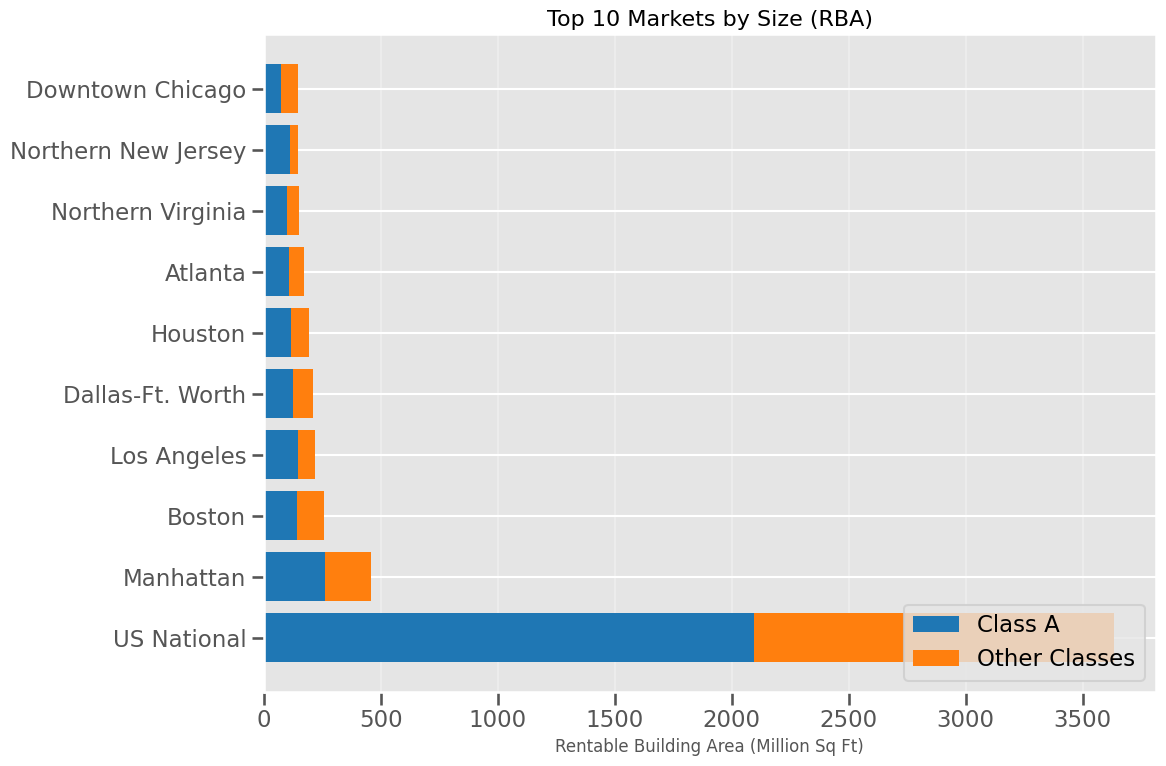


=== RENT ANALYSIS ===
Markets with highest Class A rent premium:
internal_class       A      O  Premium_Pct
market                                    
Boston           49.32  25.55        93.02
Houston          34.34  21.60        58.96
Seattle          48.45  31.92        51.78
Atlanta          32.32  22.80        41.76
Manhattan        86.88  61.99        40.16
South Florida    44.33  31.94        38.81
Austin           46.84  33.97        37.88
Chicago Suburbs  28.50  20.89        36.45
Tampa            31.60  23.27        35.82
Charlotte        33.38  25.46        31.10

Markets with lowest Class A rent premium (or discount):
internal_class          A      O  Premium_Pct
market                                       
Orange County (CA)  37.62  30.96        21.49
Nashville           33.36  27.50        21.29
Los Angeles         46.69  38.70        20.67
Washington DC       58.55  49.36        18.61
Philadelphia        31.33  26.48        18.32
Detroit             22.15  18.93       

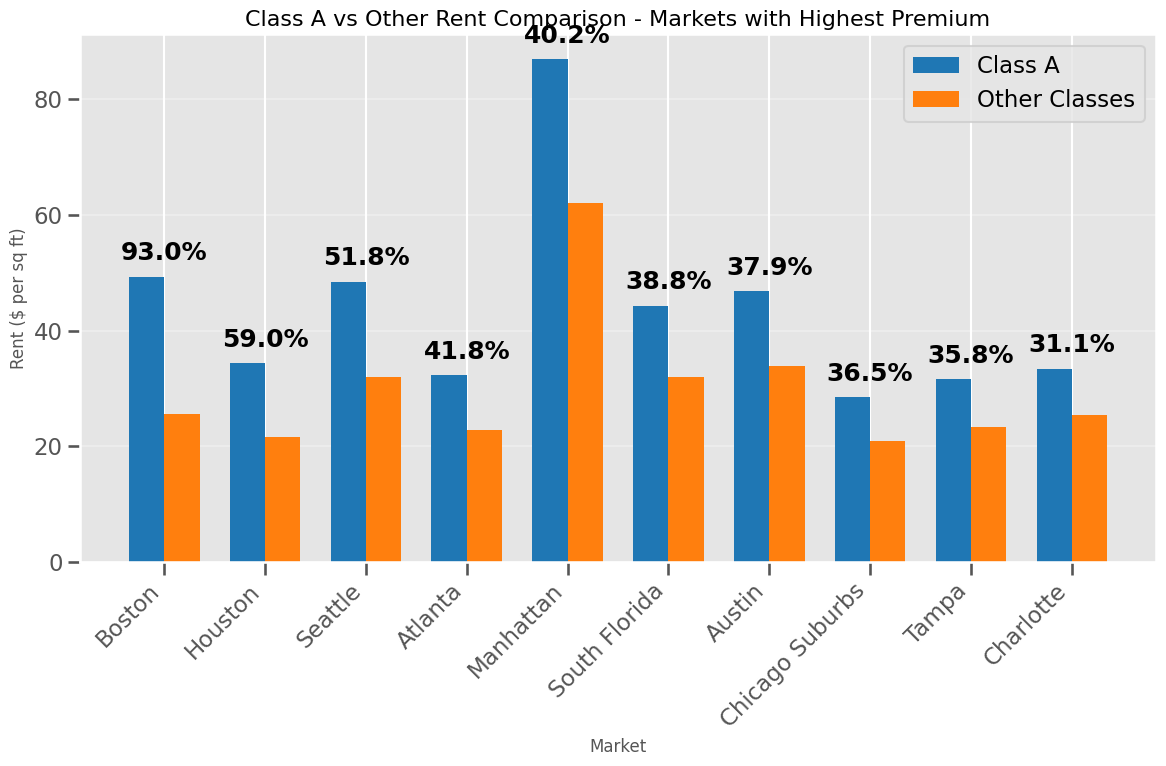


=== AVAILABILITY ANALYSIS ===
Markets with highest Class A availability rate:
internal_class           A      O
market                           
Chicago Suburbs      30.75  27.40
Houston              30.17  25.47
Dallas-Ft. Worth     27.72  26.73
Atlanta              27.41  19.69
Northern New Jersey  27.02  17.97
Phoenix              25.48  20.59
Northern Virginia    24.80  20.18
Denver-Boulder       24.62  21.70
Suburban Maryland    24.03  16.80
Orange County (CA)   23.83  16.93

Markets with lowest Class A availability rate:
internal_class        A      O
market                        
Salt Lake City    15.30  13.33
Manhattan         16.16  15.38
Boston            17.59  14.25
Downtown Chicago  18.23  25.26
Washington DC     18.52  20.51
Seattle           18.80  18.35
Charlotte         19.08  15.64
Nashville         19.27  14.93
Tampa             19.29  16.89
Raleigh-Durham    19.37  13.02


/var/folders/lk/pt5dv7dd0d38ttjklkn7zm040000gn/T/ipykernel_56247/503349737.py:170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['market_size'] = filtered_data['market'].map(market_size_dict)
/var/folders/lk/pt5dv7dd0d38ttjklkn7zm040000gn/T/ipykernel_56247/503349737.py:171: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['market_size_scaled'] = filtered_data['market_size'] / 10000000  # Scale for bubble size


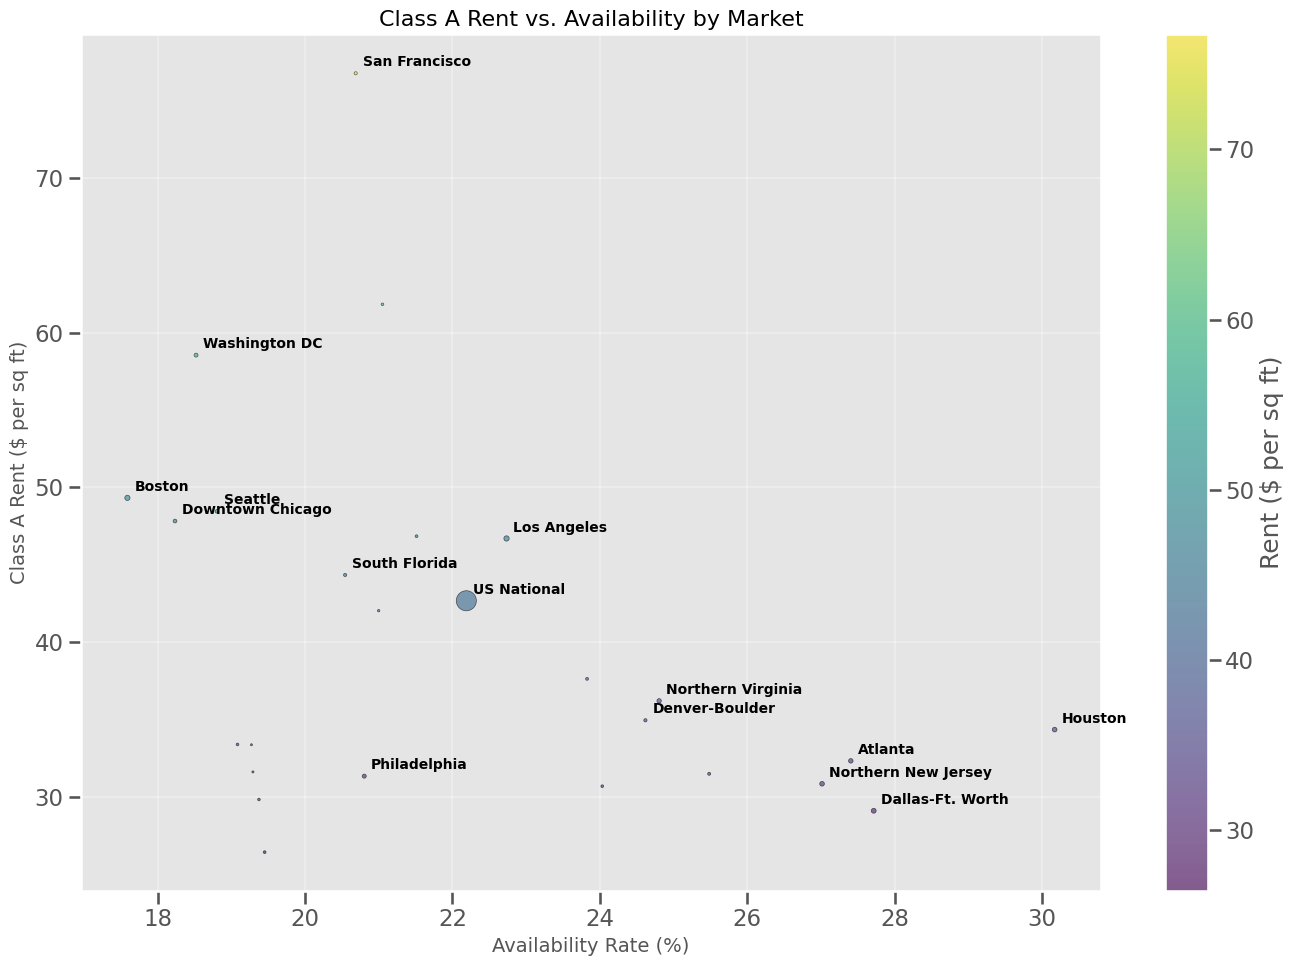


=== TIME SERIES ANALYSIS ===


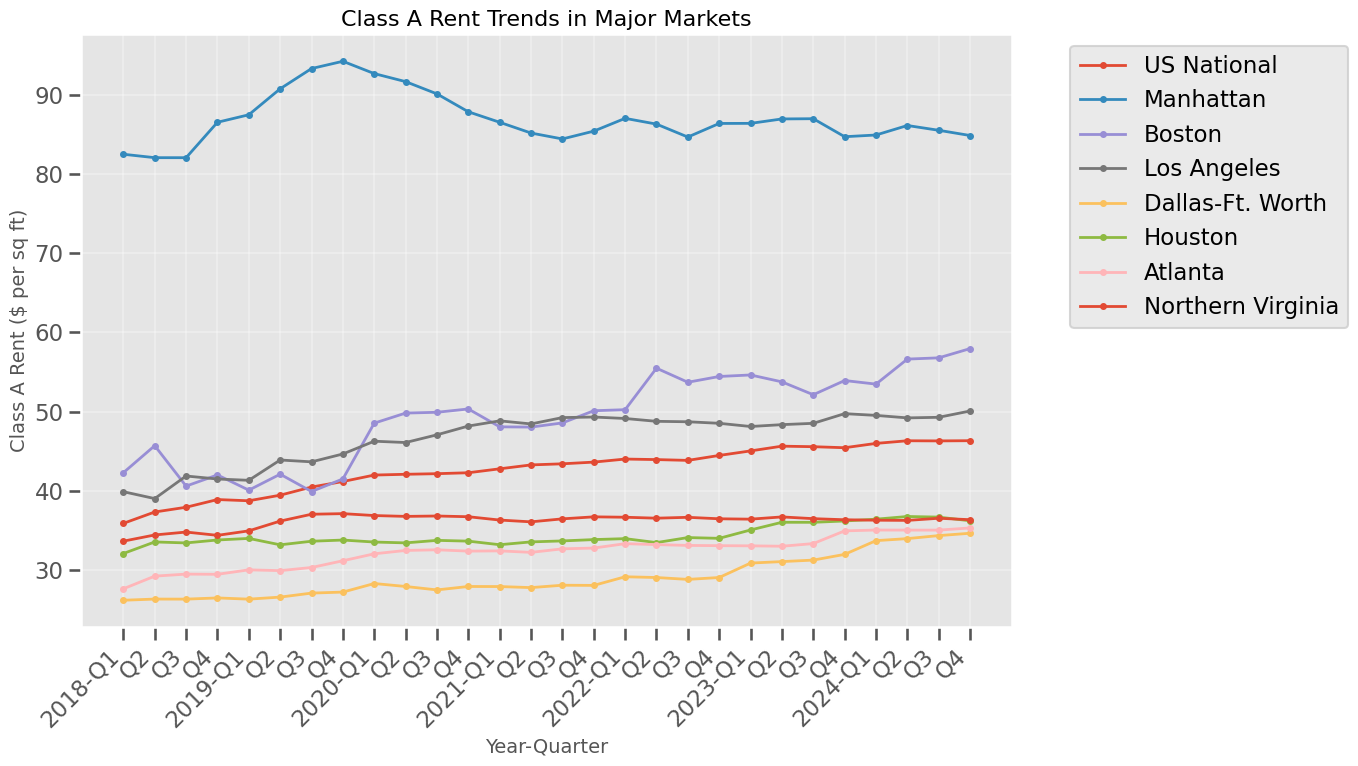


=== MARKET CORRELATION ANALYSIS ===


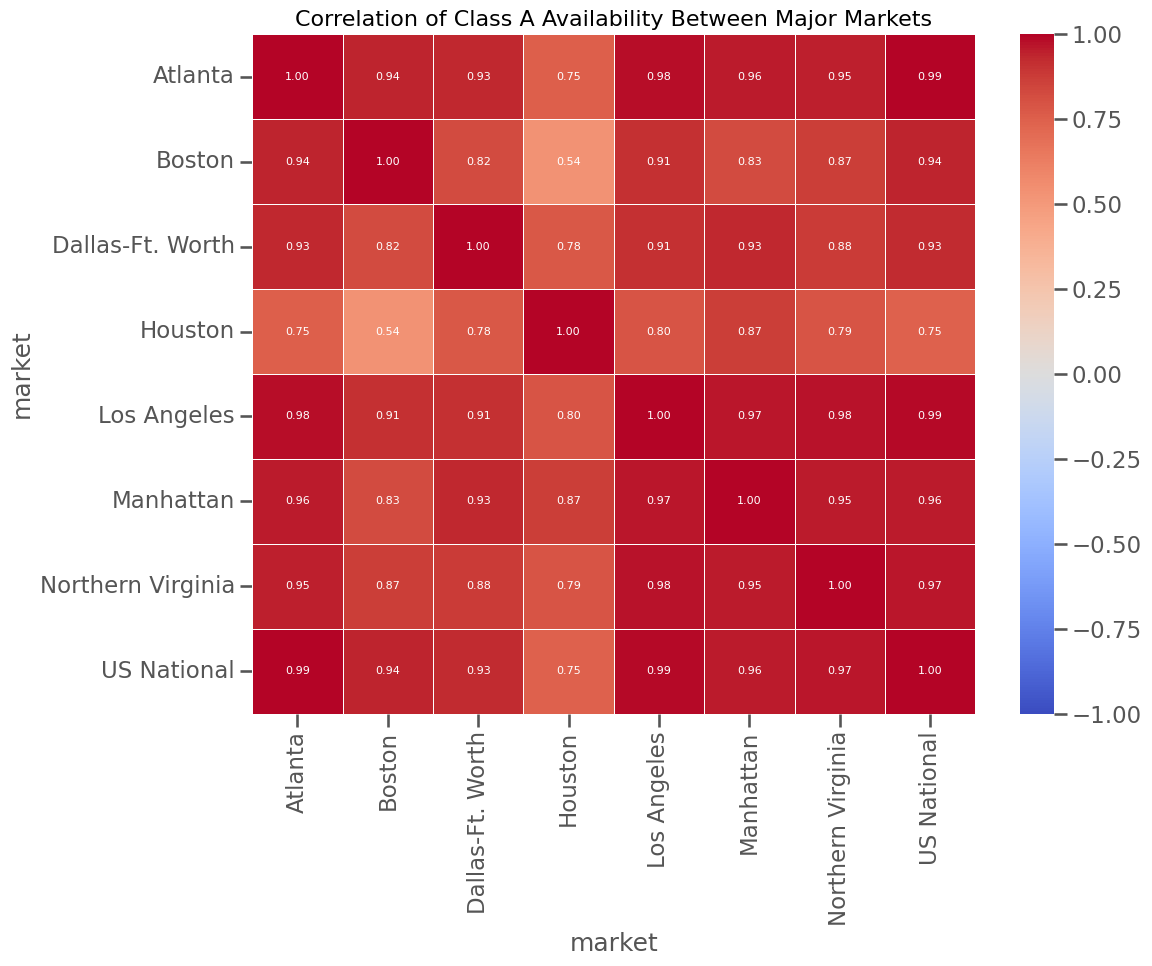

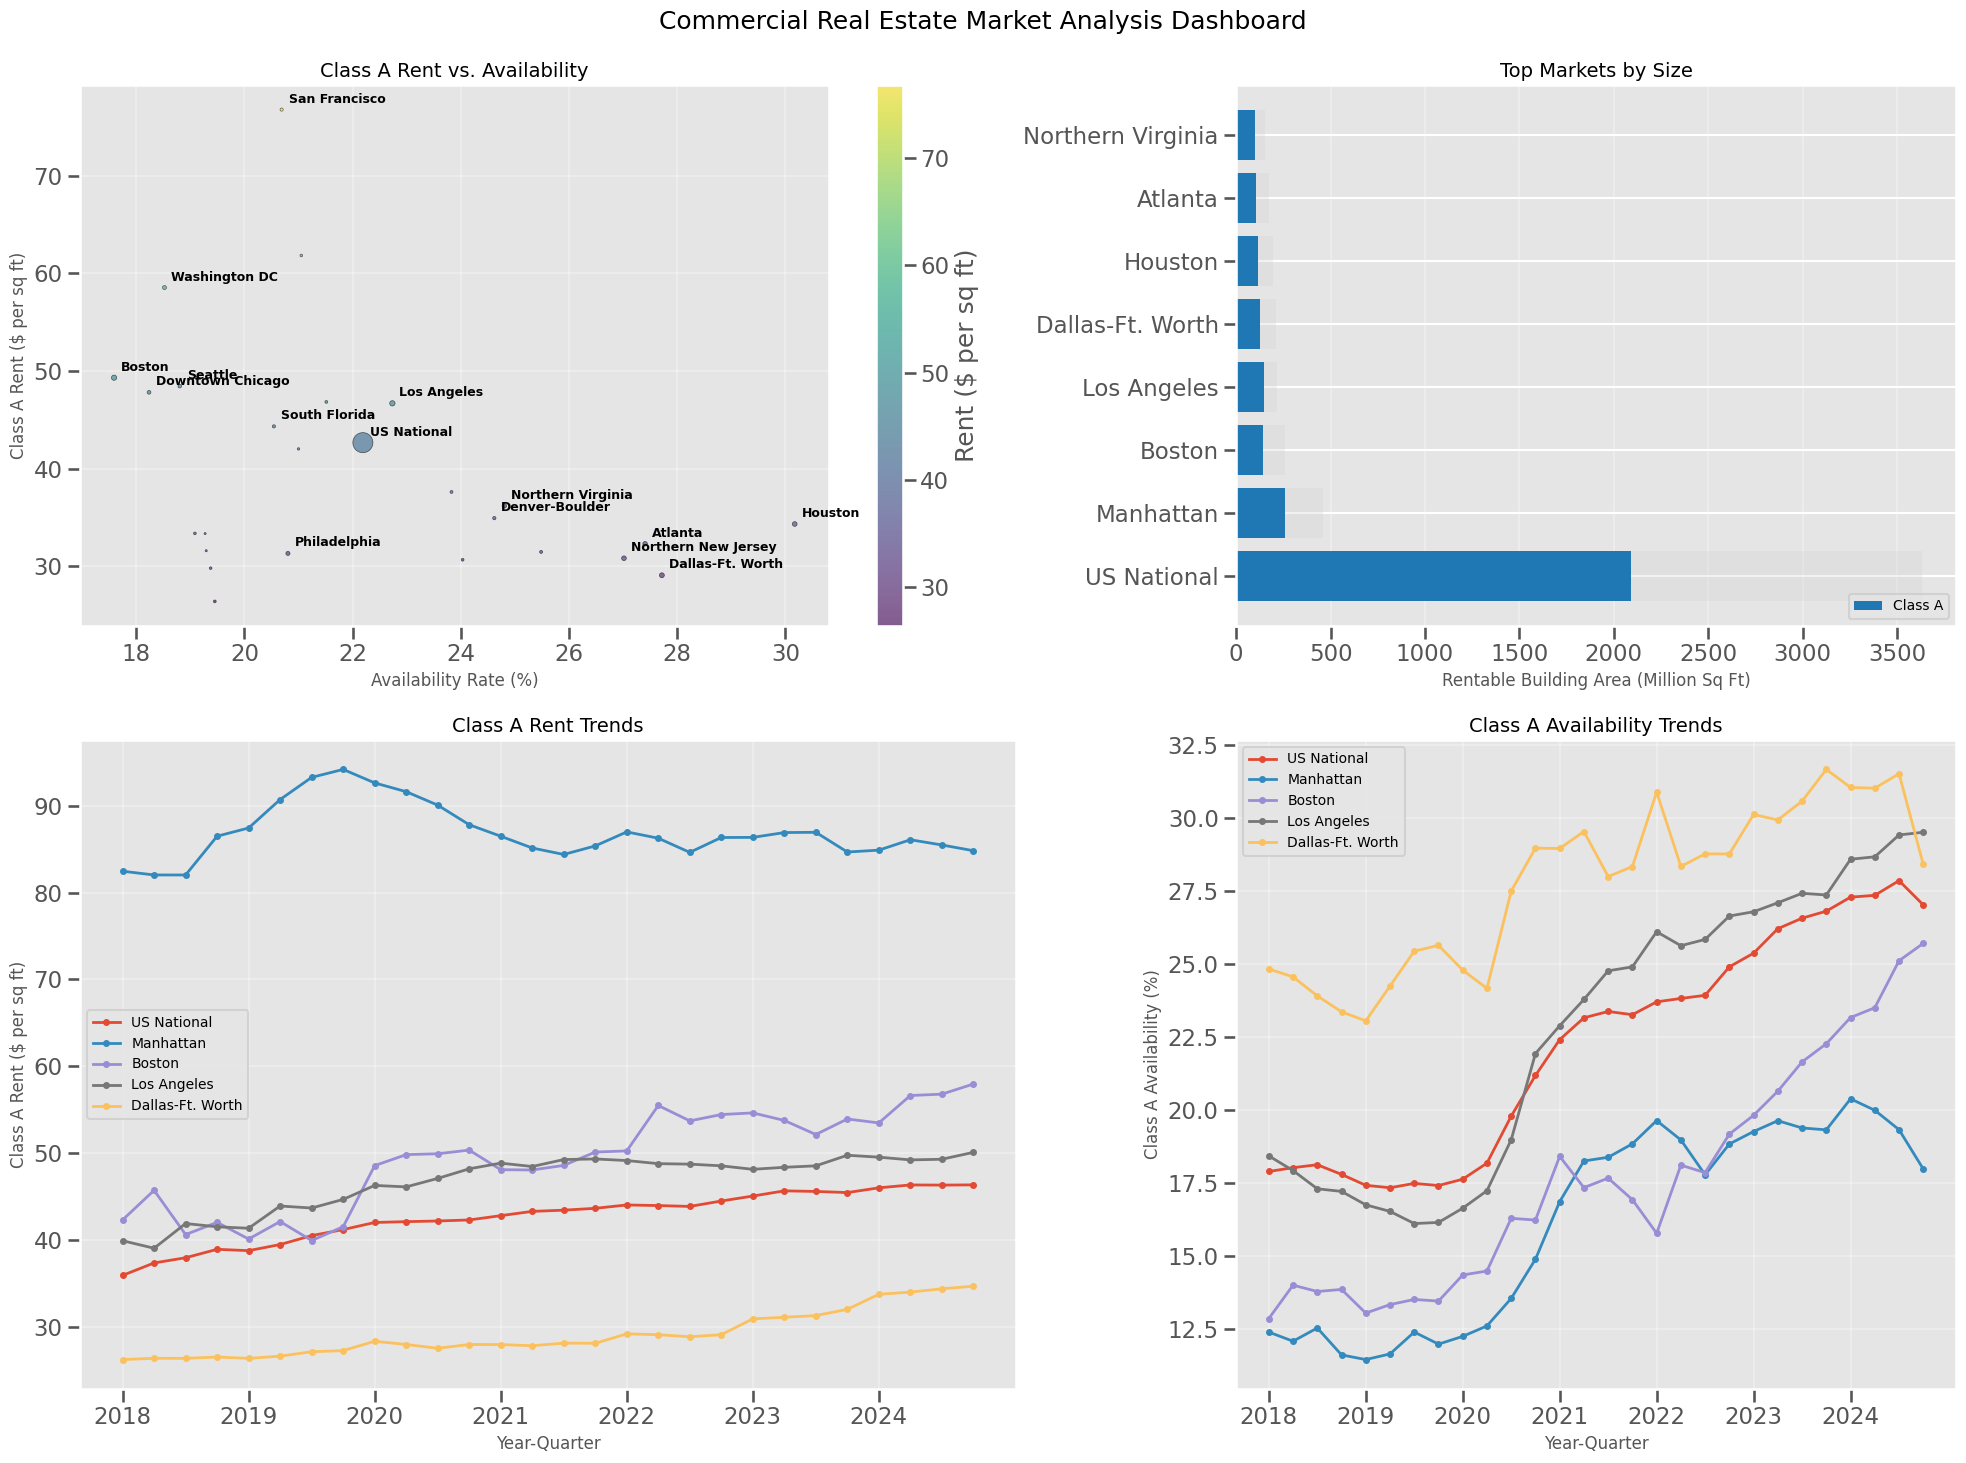


=== RENT-AVAILABILITY RELATIONSHIP ANALYSIS ===
Markets with strongest negative correlation between rent and availability (tight markets):
                market  correlation  data_points
16  Orange County (CA)       -0.740           28
2            Baltimore       -0.695           28
22       San Francisco       -0.450           28
13           Manhattan       -0.395           28
29       Washington DC       -0.126           28
24           South Bay        0.157           28
8              Detroit        0.230           28
10             Houston        0.252           28
15   Northern Virginia        0.303           28
25       South Florida        0.354           28

Markets with strongest positive correlation between rent and availability (premium markets):
              market  correlation  data_points
21         San Diego        0.842           28
1             Austin        0.849           28
3             Boston        0.866           28
27             Tampa        0.866      

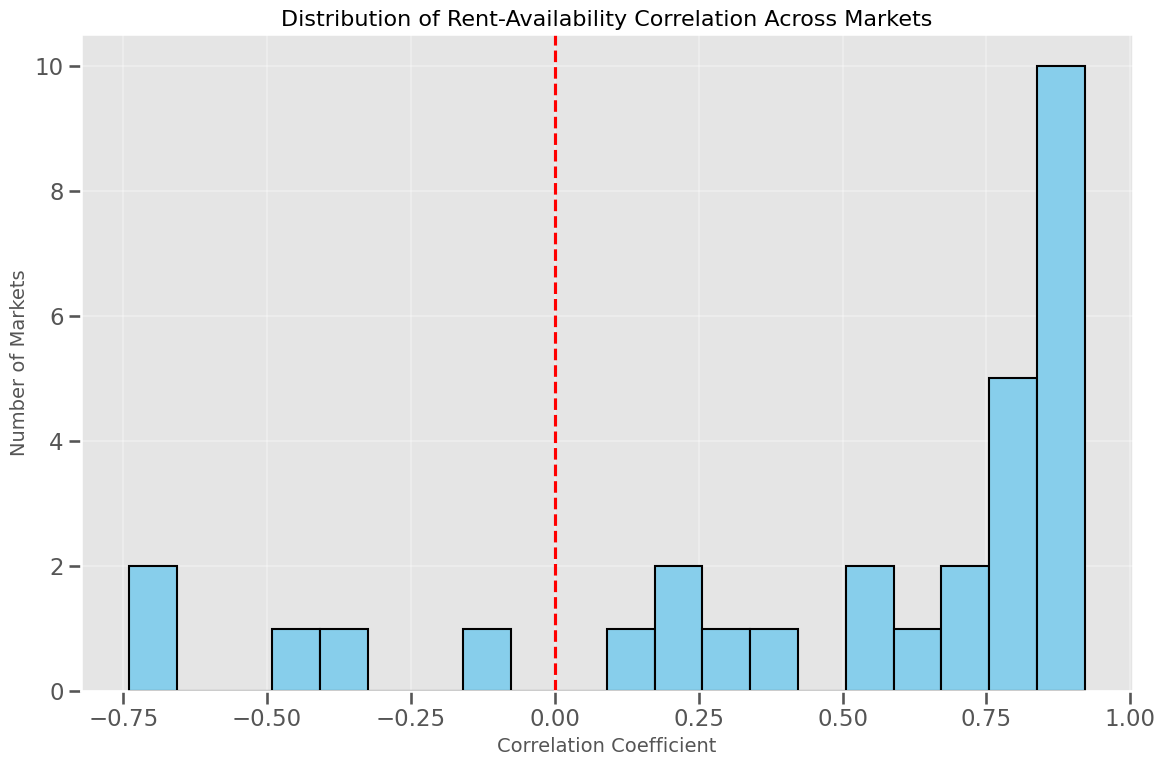

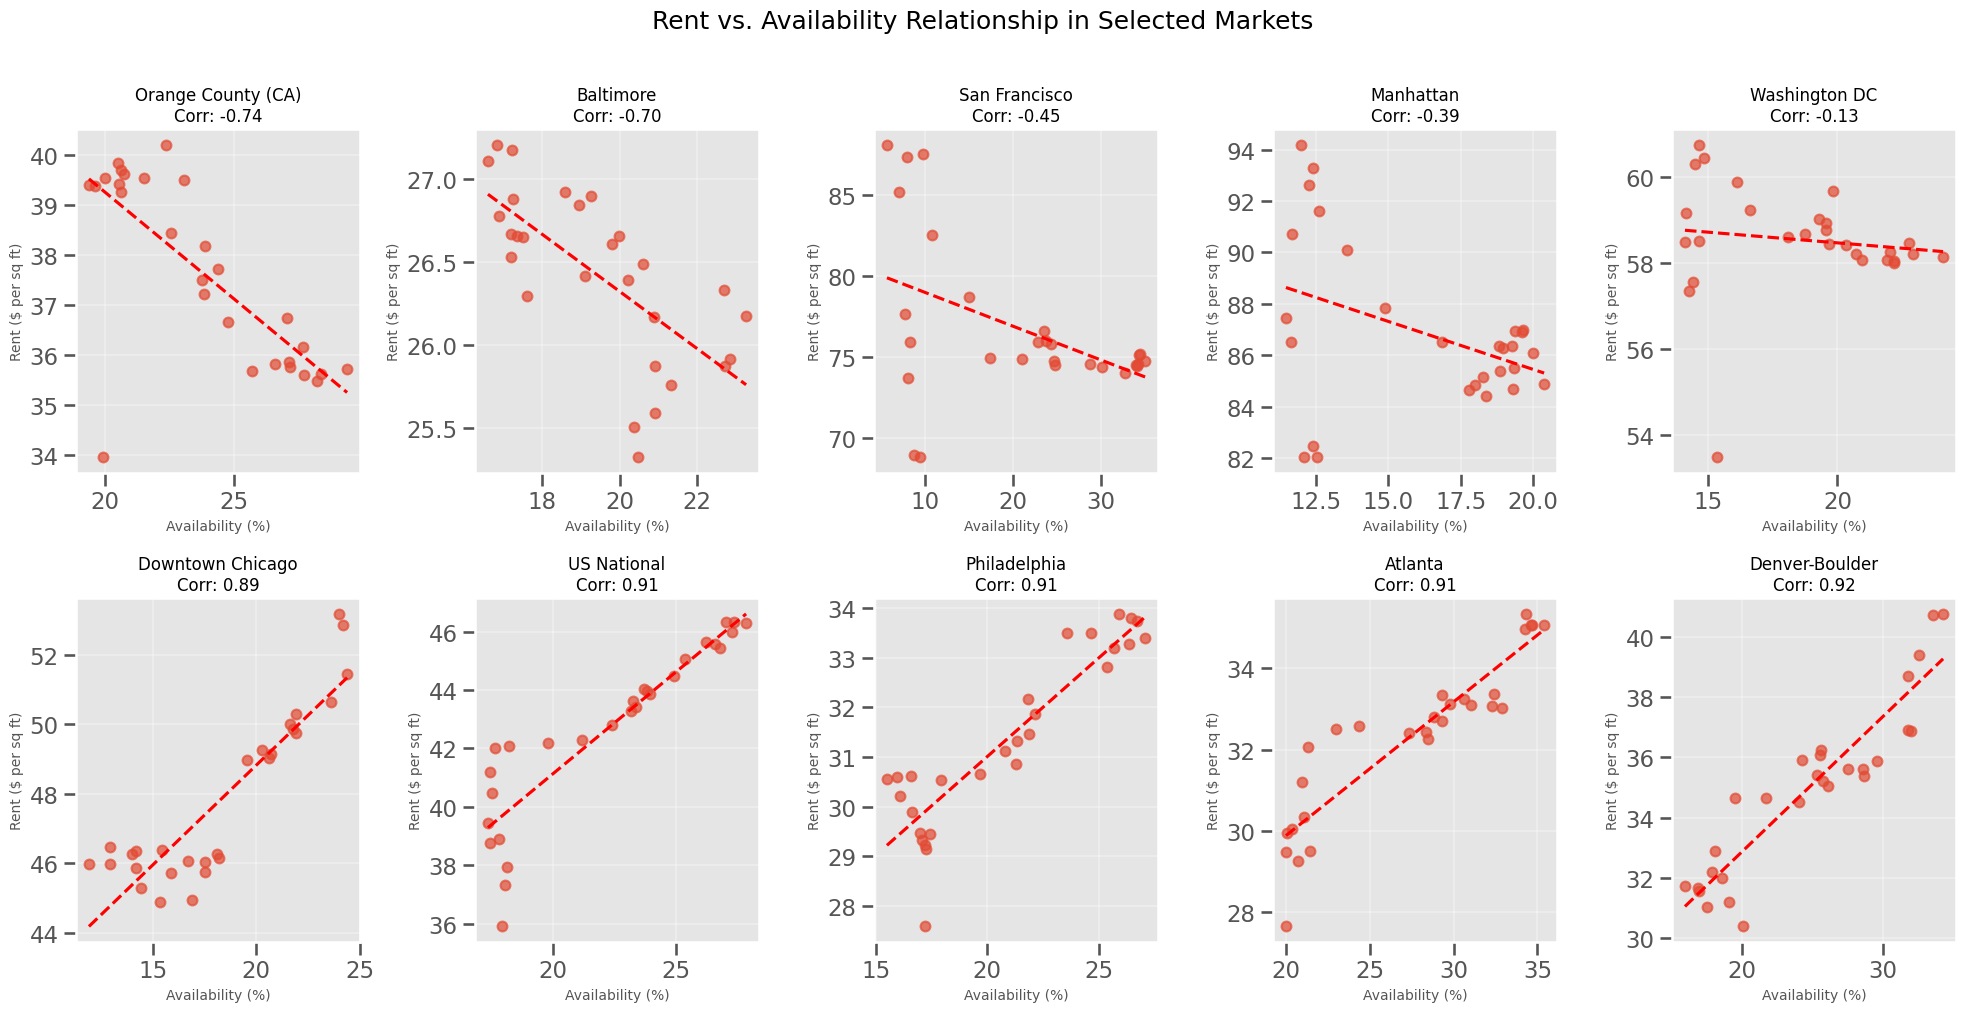


=== CLASS PREMIUM ANALYSIS ===


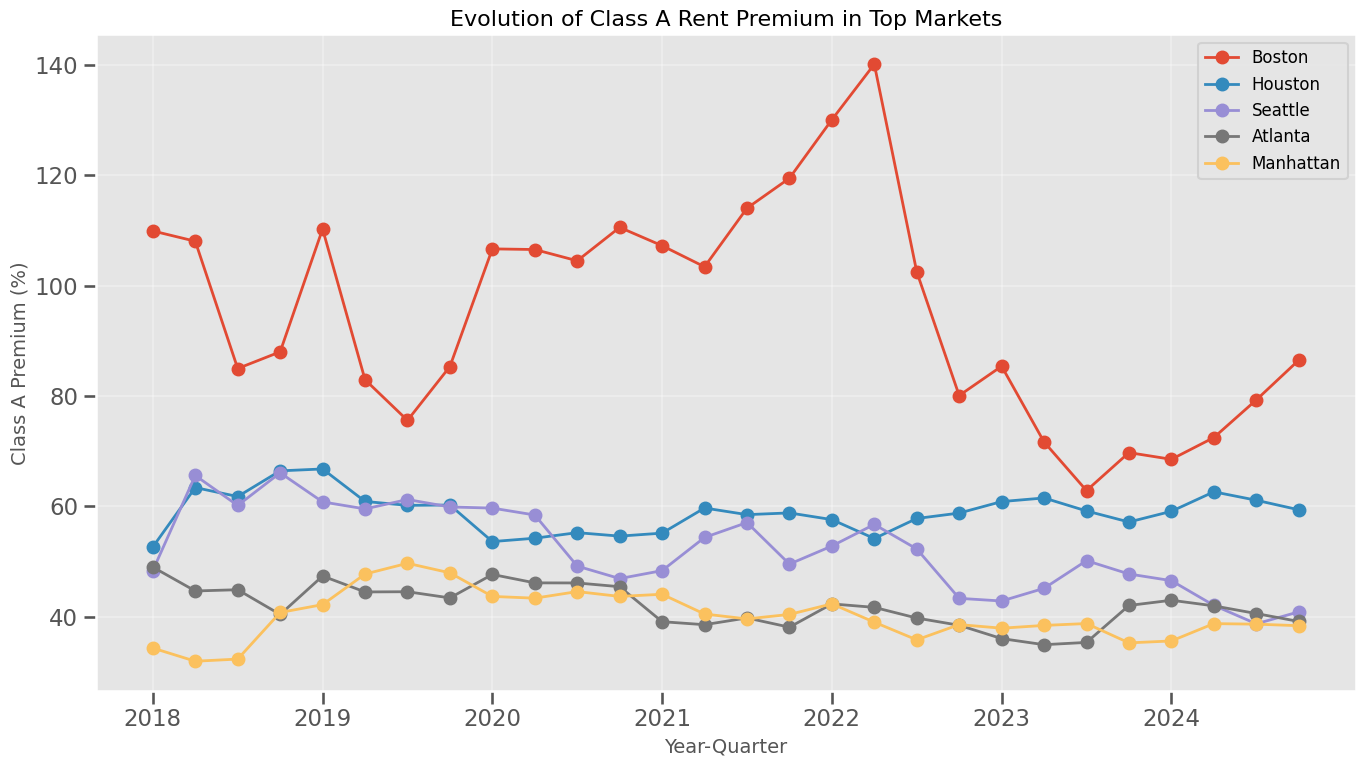

Analysis complete. All visualizations generated for Price and Availability Data.


In [3]:
# Set visualization style
plt.style.use('ggplot')
sns.set_context("talk")

# Define color palettes
class_colors = {"A": "#1f77b4", "O": "#ff7f0e"}  # Blue for Class A, Orange for Other

# Function to format currency on axes
def currency_formatter(x, pos):
    return f'${x:.0f}'

# Function to format percentage on axes
def percentage_formatter(x, pos):
    return f'{x:.0f}%'

# Load the data
df = pd.read_csv('Price_and_Availability_Data.csv')

# Basic data preprocessing
print("Dataset shape:", df.shape)
print("\nFirst few rows:")
print(df.head())

# Check for missing values
missing_data = df.isnull().sum().sort_values(ascending=False)
missing_percent = (missing_data / len(df) * 100).round(2)
missing_df = pd.DataFrame({'Missing Values': missing_data, 'Percentage': missing_percent})
print("\nMissing values in key columns:")
print(missing_df[missing_df['Missing Values'] > 0].head(10))

# Replace 'NA' strings with NaN values for proper handling
df = df.replace('NA', np.nan)

# Convert data types for numeric columns
numeric_cols = ['RBA', 'available_space', 'availability_proportion', 'internal_class_rent', 
                'overall_rent', 'direct_available_space', 'direct_availability_proportion',
                'direct_internal_class_rent', 'direct_overall_rent', 'sublet_available_space',
                'sublet_availability_proportion', 'sublet_internal_class_rent', 
                'sublet_overall_rent', 'leasing']

for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Create a period column for time series analysis
df['period'] = df['year'].astype(str) + '-' + df['quarter']
df['period_num'] = df['year'] + df['quarter'].apply(lambda q: {'Q1': 0.0, 'Q2': 0.25, 'Q3': 0.5, 'Q4': 0.75}[q])

# Convert availability to percentage for visualization
df['availability_pct'] = df['availability_proportion'] * 100

# Get unique markets, periods, and classes
markets = df['market'].unique()
periods = sorted(df['period'].unique())
classes = df['internal_class'].unique()

print(f"\nAnalyzing {len(markets)} markets over {len(periods)} periods")
print(f"Building classes: {list(classes)}")

# 1. Market Size Analysis - RBA (Rentable Building Area)
print("\n=== MARKET SIZE ANALYSIS ===")
# Calculate total RBA by market and class
market_size = df.groupby(['market', 'internal_class'])['RBA'].mean().reset_index()
market_size_pivot = market_size.pivot(index='market', columns='internal_class', values='RBA')
market_size_pivot['Total'] = market_size_pivot.sum(axis=1)
market_size_pivot = market_size_pivot.sort_values('Total', ascending=False)

# Display top 10 markets by size
print("Top 10 markets by total rentable building area (RBA):")
print(market_size_pivot.head(10)[['A', 'O', 'Total']].apply(lambda x: x / 1000000).round(2))

# Visualize top 10 markets by size
plt.figure(figsize=(12, 8))
top_markets = market_size_pivot.head(10).copy()
top_markets = top_markets.reset_index()

# Create stacked bar chart
bars = plt.barh(top_markets['market'], top_markets['A'] / 1000000, color=class_colors['A'], label='Class A')
bars = plt.barh(top_markets['market'], top_markets['O'] / 1000000, left=top_markets['A'] / 1000000, 
         color=class_colors['O'], label='Other Classes')

plt.xlabel('Rentable Building Area (Million Sq Ft)', fontsize=12)
plt.title('Top 10 Markets by Size (RBA)', fontsize=16)
plt.legend(loc='lower right')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# 2. Rent Analysis
print("\n=== RENT ANALYSIS ===")
# Calculate average rent by market and class
rent_by_market = df.groupby(['market', 'internal_class'])['internal_class_rent'].mean().reset_index()
rent_pivot = rent_by_market.pivot(index='market', columns='internal_class', values='internal_class_rent')

# Calculate Class A premium
rent_pivot['Premium_Pct'] = ((rent_pivot['A'] / rent_pivot['O']) - 1) * 100
rent_pivot = rent_pivot.dropna(subset=['Premium_Pct']).sort_values('Premium_Pct', ascending=False)

print("Markets with highest Class A rent premium:")
print(rent_pivot.head(10)[['A', 'O', 'Premium_Pct']].round(2))

print("\nMarkets with lowest Class A rent premium (or discount):")
print(rent_pivot.tail(10)[['A', 'O', 'Premium_Pct']].round(2))

# Visualize rent premium in top markets
plt.figure(figsize=(12, 8))
top_premium_markets = rent_pivot.head(10).copy()
top_premium_markets = top_premium_markets.reset_index()

# Create grouped bar chart
x = np.arange(len(top_premium_markets))
width = 0.35

plt.bar(x - width/2, top_premium_markets['A'], width, color=class_colors['A'], label='Class A')
plt.bar(x + width/2, top_premium_markets['O'], width, color=class_colors['O'], label='Other Classes')

# Add premium percentage labels
for i, row in enumerate(top_premium_markets.itertuples()):
    plt.text(i, max(row.A, row.O) + 2, f"{row.Premium_Pct:.1f}%", 
             ha='center', va='bottom', fontweight='bold')

plt.xticks(x, top_premium_markets['market'], rotation=45, ha='right')
plt.xlabel('Market', fontsize=12)
plt.ylabel('Rent ($ per sq ft)', fontsize=12)
plt.title('Class A vs Other Rent Comparison - Markets with Highest Premium', fontsize=16)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# 3. Availability Analysis
print("\n=== AVAILABILITY ANALYSIS ===")
# Calculate average availability by market and class
avail_by_market = df.groupby(['market', 'internal_class'])['availability_pct'].mean().reset_index()
avail_pivot = avail_by_market.pivot(index='market', columns='internal_class', values='availability_pct')

# Markets with highest and lowest availability
highest_avail = avail_pivot.sort_values('A', ascending=False).head(10)
lowest_avail = avail_pivot.sort_values('A', ascending=True).head(10)

print("Markets with highest Class A availability rate:")
print(highest_avail[['A', 'O']].round(2))

print("\nMarkets with lowest Class A availability rate:")
print(lowest_avail[['A', 'O']].round(2))

# Create a scatter plot of rent vs availability for Class A
plt.figure(figsize=(14, 10))
rent_vs_avail = pd.merge(
    rent_by_market[rent_by_market['internal_class'] == 'A'],
    avail_by_market[avail_by_market['internal_class'] == 'A'],
    on=['market', 'internal_class']
)

# Filter out extreme values for better visualization
q_low_rent = rent_vs_avail['internal_class_rent'].quantile(0.01)
q_high_rent = rent_vs_avail['internal_class_rent'].quantile(0.99)
q_low_avail = rent_vs_avail['availability_pct'].quantile(0.01)
q_high_avail = rent_vs_avail['availability_pct'].quantile(0.99)

filtered_data = rent_vs_avail[
    (rent_vs_avail['internal_class_rent'] > q_low_rent) & 
    (rent_vs_avail['internal_class_rent'] < q_high_rent) &
    (rent_vs_avail['availability_pct'] > q_low_avail) & 
    (rent_vs_avail['availability_pct'] < q_high_avail)
]

# Get market size for bubble size
market_size_dict = market_size[market_size['internal_class'] == 'A'].set_index('market')['RBA'].to_dict()
filtered_data['market_size'] = filtered_data['market'].map(market_size_dict)
filtered_data['market_size_scaled'] = filtered_data['market_size'] / 10000000  # Scale for bubble size

# Create scatter plot
plt.scatter(filtered_data['availability_pct'], filtered_data['internal_class_rent'], 
            s=filtered_data['market_size_scaled'], alpha=0.6, c=filtered_data['internal_class_rent'],
            cmap='viridis', edgecolors='black', linewidths=0.5)

# Add labels for top markets
top_markets_to_label = filtered_data.nlargest(15, 'market_size')
for idx, row in top_markets_to_label.iterrows():
    plt.annotate(row['market'], 
                 (row['availability_pct'], row['internal_class_rent']),
                 xytext=(5, 5), textcoords='offset points',
                 fontsize=10, fontweight='bold')

plt.xlabel('Availability Rate (%)', fontsize=14)
plt.ylabel('Class A Rent ($ per sq ft)', fontsize=14)
plt.title('Class A Rent vs. Availability by Market', fontsize=16)
plt.grid(True, alpha=0.3)
plt.colorbar(label='Rent ($ per sq ft)')
plt.tight_layout()
plt.show()

# 4. Time Series Analysis for Major Markets
print("\n=== TIME SERIES ANALYSIS ===")
# Select top markets by size for time series analysis
top_markets_list = market_size_pivot.head(8).index.tolist()

# Analyze trends for these markets over time (Class A only)
time_series_data = df[(df['market'].isin(top_markets_list)) & (df['internal_class'] == 'A')]
time_series_data = time_series_data.sort_values(['market', 'period_num'])

# Rent trend over time
plt.figure(figsize=(14, 8))
for market in top_markets_list:
    market_data = time_series_data[time_series_data['market'] == market]
    if not market_data.empty and not market_data['internal_class_rent'].isna().all():
        plt.plot(market_data['period_num'], market_data['internal_class_rent'], 
                 marker='o', linewidth=2, markersize=4, label=market)

plt.xlabel('Year-Quarter', fontsize=14)
plt.ylabel('Class A Rent ($ per sq ft)', fontsize=14)
plt.title('Class A Rent Trends in Major Markets', fontsize=16)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)

# Format the x-axis with year-quarter labels
plt.xticks([2018, 2018.25, 2018.5, 2018.75, 
            2019, 2019.25, 2019.5, 2019.75, 
            2020, 2020.25, 2020.5, 2020.75,
            2021, 2021.25, 2021.5, 2021.75,
            2022, 2022.25, 2022.5, 2022.75,
            2023, 2023.25, 2023.5, 2023.75,
            2024, 2024.25, 2024.5, 2024.75],
           ['2018-Q1', 'Q2', 'Q3', 'Q4', 
            '2019-Q1', 'Q2', 'Q3', 'Q4',
            '2020-Q1', 'Q2', 'Q3', 'Q4',
            '2021-Q1', 'Q2', 'Q3', 'Q4',
            '2022-Q1', 'Q2', 'Q3', 'Q4',
            '2023-Q1', 'Q2', 'Q3', 'Q4',
            '2024-Q1', 'Q2', 'Q3', 'Q4'], 
           rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Availability trend over time
plt.figure(figsize=(14, 8))
for market in top_markets_list:
    market_data = time_series_data[time_series_data['market'] == market]
    if not market_data.empty and not market_data['availability_pct'].isna().all():
        plt.plot(market_data['period_num'], market_data['availability_pct'], 
                 marker='o', linewidth=2, markersize=4, label=market)

plt.xlabel('Year-Quarter', fontsize=14)
plt.ylabel('Class A Availability (%)', fontsize=14)
plt.title('Class A Availability Trends in Major Markets', fontsize=16)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)

# Format the x-axis with year-quarter labels (same as above)
plt.xticks([2018, 2018.25, 2018.5, 2018.75, 
            2019, 2019.25, 2019.5, 2019.75, 
            2020, 2020.25, 2020.5, 2020.75,
            2021, 2021.25, 2021.5, 2021.75,
            2022, 2022.25, 2022.5, 2022.75,
            2023, 2023.25, 2023.5, 2023.75,
            2024, 2024.25, 2024.5, 2024.75],
           ['2018-Q1', 'Q2', 'Q3', 'Q4', 
            '2019-Q1', 'Q2', 'Q3', 'Q4',
            '2020-Q1', 'Q2', 'Q3', 'Q4',
            '2021-Q1', 'Q2', 'Q3', 'Q4',
            '2022-Q1', 'Q2', 'Q3', 'Q4',
            '2023-Q1', 'Q2', 'Q3', 'Q4',
            '2024-Q1', 'Q2', 'Q3', 'Q4'], 
           rotation=45, ha='right')

plt.tight_layout()
plt.show()

# 5. Market Correlation Analysis
print("\n=== MARKET CORRELATION ANALYSIS ===")
# Prepare data for correlation analysis
pivot_markets = []
for market in top_markets_list:
    market_data = time_series_data[time_series_data['market'] == market]
    if len(market_data) > 10:  # Only include markets with sufficient data points
        pivot_markets.append(market)

# Create pivot tables for correlation analysis
rent_time_pivot = pd.pivot_table(
    time_series_data[time_series_data['market'].isin(pivot_markets)],
    values='internal_class_rent',
    index='period',
    columns='market'
).dropna(thresh=len(pivot_markets)//2)  # Keep periods with at least half of markets having data

avail_time_pivot = pd.pivot_table(
    time_series_data[time_series_data['market'].isin(pivot_markets)],
    values='availability_pct',
    index='period',
    columns='market'
).dropna(thresh=len(pivot_markets)//2)

# Calculate rent correlation between markets
rent_corr = rent_time_pivot.corr()
avail_corr = avail_time_pivot.corr()

# Visualize rent correlation
plt.figure(figsize=(12, 10))
sns.heatmap(rent_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, 
            annot_kws={"size": 8}, fmt=".2f", linewidths=0.5)
plt.title('Correlation of Class A Rents Between Major Markets', fontsize=16)
plt.tight_layout()
plt.show()

# Visualize availability correlation
plt.figure(figsize=(12, 10))
sns.heatmap(avail_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, 
            annot_kws={"size": 8}, fmt=".2f", linewidths=0.5)
plt.title('Correlation of Class A Availability Between Major Markets', fontsize=16)
plt.tight_layout()
plt.show()

# 6. Comprehensive Dashboard: Rent, Availability, and Market Size
plt.figure(figsize=(20, 15))
gs = gridspec.GridSpec(2, 2, width_ratios=[1.3, 1], height_ratios=[1, 1.2])

# Plot 1: Rent vs. Availability Scatter
ax1 = plt.subplot(gs[0, 0])
scatter = ax1.scatter(filtered_data['availability_pct'], filtered_data['internal_class_rent'], 
                     s=filtered_data['market_size_scaled'], alpha=0.6, 
                     c=filtered_data['internal_class_rent'], cmap='viridis', 
                     edgecolors='black', linewidths=0.5)

# Label top markets
for idx, row in top_markets_to_label.iterrows():
    ax1.annotate(row['market'], 
                (row['availability_pct'], row['internal_class_rent']),
                xytext=(5, 5), textcoords='offset points',
                fontsize=9, fontweight='bold')

ax1.set_xlabel('Availability Rate (%)', fontsize=12)
ax1.set_ylabel('Class A Rent ($ per sq ft)', fontsize=12)
ax1.set_title('Class A Rent vs. Availability', fontsize=14)
ax1.grid(True, alpha=0.3)
plt.colorbar(scatter, ax=ax1, label='Rent ($ per sq ft)')

# Plot 2: Top Markets by Size
ax2 = plt.subplot(gs[0, 1])
top_size = market_size_pivot.head(8).copy().reset_index()
ax2.barh(top_size['market'], top_size['Total'] / 1000000, color='lightgray', alpha=0.3)
ax2.barh(top_size['market'], top_size['A'] / 1000000, color=class_colors['A'], label='Class A')

ax2.set_xlabel('Rentable Building Area (Million Sq Ft)', fontsize=12)
ax2.set_title('Top Markets by Size', fontsize=14)
ax2.legend(loc='lower right', fontsize=10)
ax2.grid(axis='x', alpha=0.3)

# Plot 3: Rent Trends
ax3 = plt.subplot(gs[1, 0])

for market in top_markets_list[:5]:  # Limit to top 5 markets for clarity
    market_data = time_series_data[time_series_data['market'] == market]
    if not market_data.empty and not market_data['internal_class_rent'].isna().all():
        ax3.plot(market_data['period_num'], market_data['internal_class_rent'], 
                marker='o', linewidth=2, markersize=4, label=market)

ax3.set_xlabel('Year-Quarter', fontsize=12)
ax3.set_ylabel('Class A Rent ($ per sq ft)', fontsize=12)
ax3.set_title('Class A Rent Trends', fontsize=14)
ax3.legend(fontsize=10)
ax3.grid(True, alpha=0.3)

# Format x-axis
ax3.set_xticks([2018, 2019, 2020, 2021, 2022, 2023, 2024])
ax3.set_xticklabels(['2018', '2019', '2020', '2021', '2022', '2023', '2024'])

# Plot 4: Availability Trends
ax4 = plt.subplot(gs[1, 1])

for market in top_markets_list[:5]:  # Same top 5 markets
    market_data = time_series_data[time_series_data['market'] == market]
    if not market_data.empty and not market_data['availability_pct'].isna().all():
        ax4.plot(market_data['period_num'], market_data['availability_pct'], 
                marker='o', linewidth=2, markersize=4, label=market)

ax4.set_xlabel('Year-Quarter', fontsize=12)
ax4.set_ylabel('Class A Availability (%)', fontsize=12)
ax4.set_title('Class A Availability Trends', fontsize=14)
ax4.legend(fontsize=10)
ax4.grid(True, alpha=0.3)

# Format x-axis
ax4.set_xticks([2018, 2019, 2020, 2021, 2022, 2023, 2024])
ax4.set_xticklabels(['2018', '2019', '2020', '2021', '2022', '2023', '2024'])

plt.suptitle('Commercial Real Estate Market Analysis Dashboard', fontsize=18, y=0.98)
plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()

# 7. Rent vs Availability Relationship Analysis
print("\n=== RENT-AVAILABILITY RELATIONSHIP ANALYSIS ===")
# For each market, calculate correlation between rent and availability
rent_avail_corr = []

for market in markets:
    market_data = df[(df['market'] == market) & (df['internal_class'] == 'A')]
    if len(market_data) >= 5:  # Only include markets with sufficient data points
        corr = market_data['internal_class_rent'].corr(market_data['availability_pct'])
        if not np.isnan(corr):
            rent_avail_corr.append({
                'market': market,
                'correlation': corr,
                'data_points': len(market_data)
            })

rent_avail_corr_df = pd.DataFrame(rent_avail_corr)
rent_avail_corr_df = rent_avail_corr_df.sort_values('correlation')

# Print markets with strongest negative and positive correlations
print("Markets with strongest negative correlation between rent and availability (tight markets):")
print(rent_avail_corr_df.head(10)[['market', 'correlation', 'data_points']].round(3))

print("\nMarkets with strongest positive correlation between rent and availability (premium markets):")
print(rent_avail_corr_df.tail(10)[['market', 'correlation', 'data_points']].round(3))

# Visualize correlation distribution
plt.figure(figsize=(12, 8))
plt.hist(rent_avail_corr_df['correlation'], bins=20, color='skyblue', edgecolor='black')
plt.axvline(x=0, color='red', linestyle='--')
plt.xlabel('Correlation Coefficient', fontsize=14)
plt.ylabel('Number of Markets', fontsize=14)
plt.title('Distribution of Rent-Availability Correlation Across Markets', fontsize=16)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Plot the top 5 most negative and positive correlation markets
correlation_examples = pd.concat([
    rent_avail_corr_df.head(5),  # Most negative correlation
    rent_avail_corr_df.tail(5)   # Most positive correlation
])

fig, axes = plt.subplots(2, 5, figsize=(20, 10))
axes = axes.flatten()

for i, (idx, row) in enumerate(correlation_examples.iterrows()):
    market = row['market']
    market_data = df[(df['market'] == market) & (df['internal_class'] == 'A')]
    
    if not market_data.empty:
        axes[i].scatter(market_data['availability_pct'], market_data['internal_class_rent'], 
                       alpha=0.7, s=50)
        
        # Add regression line
        if len(market_data) > 1:
            from scipy import stats
            slope, intercept, r_value, p_value, std_err = stats.linregress(
                market_data['availability_pct'], market_data['internal_class_rent']
            )
            x = np.array([market_data['availability_pct'].min(), market_data['availability_pct'].max()])
            axes[i].plot(x, intercept + slope * x, 'r--')
        
        axes[i].set_title(f"{market}\nCorr: {row['correlation']:.2f}", fontsize=12)
        axes[i].set_xlabel('Availability (%)', fontsize=10)
        axes[i].set_ylabel('Rent ($ per sq ft)', fontsize=10)
        axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('Rent vs. Availability Relationship in Selected Markets', fontsize=18, y=1.02)
plt.subplots_adjust(top=0.9)
plt.show()

# 8. Class A vs Other Classes Premium Analysis
print("\n=== CLASS PREMIUM ANALYSIS ===")
# Calculate class premium evolution over time for major markets
top_premium_markets_list = rent_pivot.head(5).index.tolist()

# Extract data for these markets
premium_time_data = df[df['market'].isin(top_premium_markets_list)]

# Calculate premium by period for each market
premium_over_time = []

for market in top_premium_markets_list:
    for period in periods:
        period_data = premium_time_data[(premium_time_data['market'] == market) & 
                                        (premium_time_data['period'] == period)]
        
        if len(period_data) >= 2:  # Need both classes
            class_a_data = period_data[period_data['internal_class'] == 'A']
            class_o_data = period_data[period_data['internal_class'] == 'O']
            
            if not class_a_data.empty and not class_o_data.empty:
                class_a_rent = class_a_data['internal_class_rent'].iloc[0]
                class_o_rent = class_o_data['internal_class_rent'].iloc[0]
                
                if not np.isnan(class_a_rent) and not np.isnan(class_o_rent) and class_o_rent > 0:
                    premium_pct = ((class_a_rent / class_o_rent) - 1) * 100
                    
                    premium_over_time.append({
                        'market': market,
                        'period': period,
                        'period_num': period_data['period_num'].iloc[0],
                        'class_a_rent': class_a_rent,
                        'class_o_rent': class_o_rent,
                        'premium_pct': premium_pct
                    })

premium_df = pd.DataFrame(premium_over_time)

# Visualize premium evolution
plt.figure(figsize=(14, 8))

for market in top_premium_markets_list:
    market_data = premium_df[premium_df['market'] == market]
    if not market_data.empty:
        plt.plot(market_data['period_num'], market_data['premium_pct'], 
                marker='o', linewidth=2, label=market)

plt.xlabel('Year-Quarter', fontsize=14)
plt.ylabel('Class A Premium (%)', fontsize=14)
plt.title('Evolution of Class A Rent Premium in Top Markets', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)

# Format the x-axis
plt.xticks([2018, 2019, 2020, 2021, 2022, 2023, 2024],
           ['2018', '2019', '2020', '2021', '2022', '2023', '2024'])

plt.tight_layout()
plt.show()

print("Analysis complete. All visualizations generated for Price and Availability Data.")